# MPI Broadcast Algorithms Performance Analysis
This notebook aims to collect, compare, and analyze the performance of different MPI broadcast algorithms.
The baseline for comparison will be the `basic_linear` algorithm. We will try to infer the performance models behind the selected algorithms, considering the architecture on which they are executed.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Improve the visuals for our plots
sns.set_theme(style='whitegrid')

## Load and Prepare Data
Load the data from the CSV files containing the results from different MPI broadcast algorithms and prepare it for analysis.

In [2]:
# Assuming data is in a DataFrame named df and structured with columns: ['Algorithm', 'Processes', 'Size', 'Latency']
# You will need to adjust paths and filenames according to your actual data locations

# Example of loading data (you would replace this with your actual data loading code)
df = pd.read_csv('thin_bcast_results.csv')
# Display the first few rows of the data
df.head()

# check data types and look for missing values
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Algorithm  1440 non-null   object 
 1   Processes  1440 non-null   int64  
 2   Size       1440 non-null   int64  
 3   Latency    1440 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 45.1+ KB
None


## Data Analysis
Analyze the data by visualizing and comparing the latency across different algorithms and message sizes.

In [3]:
# Example of plotting data (replace with actual plotting code)
# Plot latency vs. size for different algorithms
# plt.figure(figsize=(12, 8))
# sns.lineplot(data=df, x='Size', y='Latency', hue='Algorithm', style='Algorithm', markers=True, dashes=False)
# plt.title('Latency by Message Size for Different Algorithms')
# plt.xlabel('Message Size (bytes)')
# plt.ylabel('Latency (microseconds)')
# plt.loglog()  # Optionally set a logarithmic scale
# plt.show()

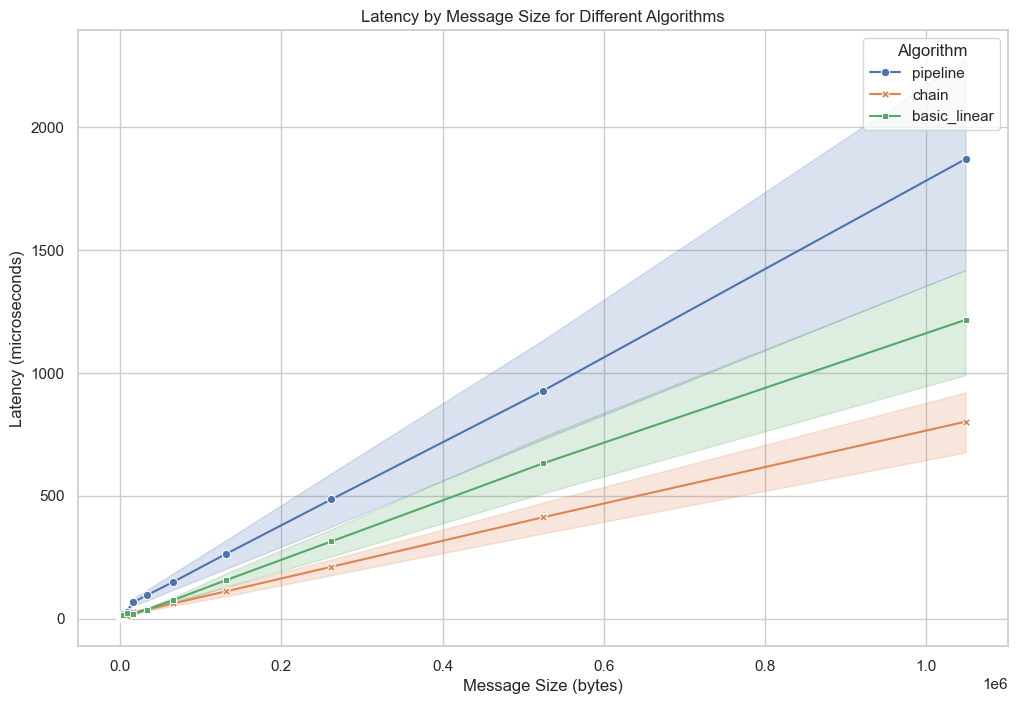

In [4]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='Size', y='Latency', hue='Algorithm', style='Algorithm', markers=True, dashes=False)
plt.title('Latency by Message Size for Different Algorithms')
plt.xlabel('Message Size (bytes)')
plt.ylabel('Latency (microseconds)')
plt.show()

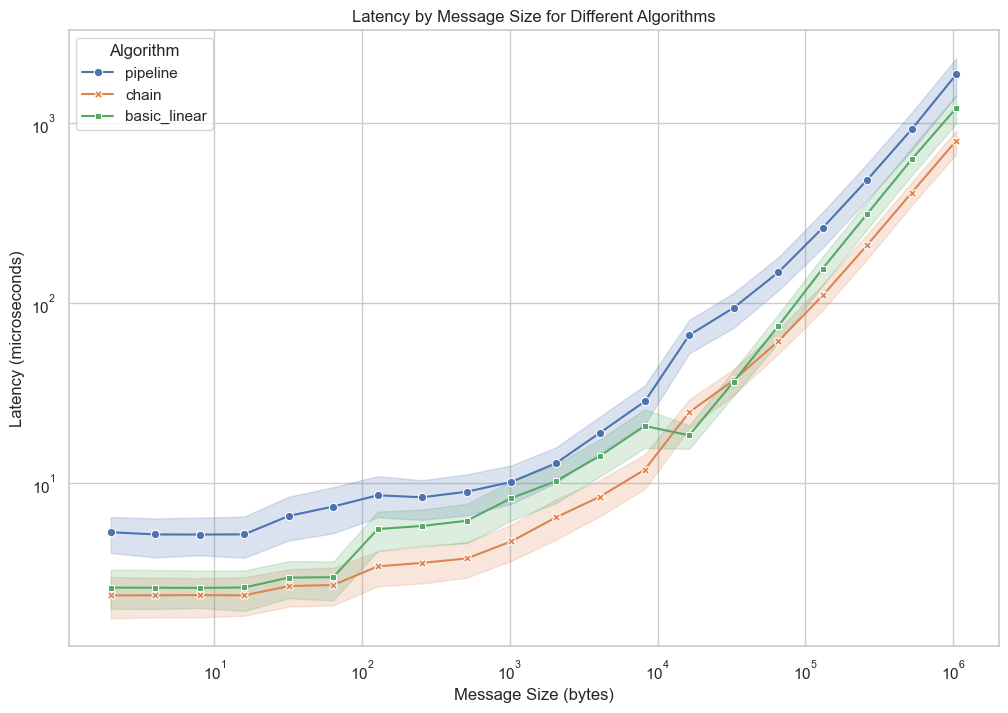

In [5]:
# Plot latency by message size for each algorithm
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='Size', y='Latency', hue='Algorithm', style='Algorithm', markers=True, dashes=False)
plt.title('Latency by Message Size for Different Algorithms')
plt.xlabel('Message Size (bytes)')
plt.ylabel('Latency (microseconds)')
plt.xscale('log')  # Use logarithmic scale for better visibility on large ranges
plt.yscale('log')
plt.show()

Plot 1: Latency by Message Size for Different Algorithms
Observations:
- The `pipeline` algorithm shows significantly higher latency as message size increases compared to chain and basic_linear. This suggests that while the pipeline algorithm might be designed to handle large messages efficiently by segmenting them, it incurs overhead that increases rapidly with message size.
- The `chain` algorithm, while generally slower than basic_linear, doesn't show as steep an increase in latency with larger message sizes, which could indicate better handling of network traffic and lower overhead per transmitted byte.
- `basic_linear` maintains the lowest latency across all message sizes, indicating its efficiency in environments where direct communication paths are fast and low in contention.

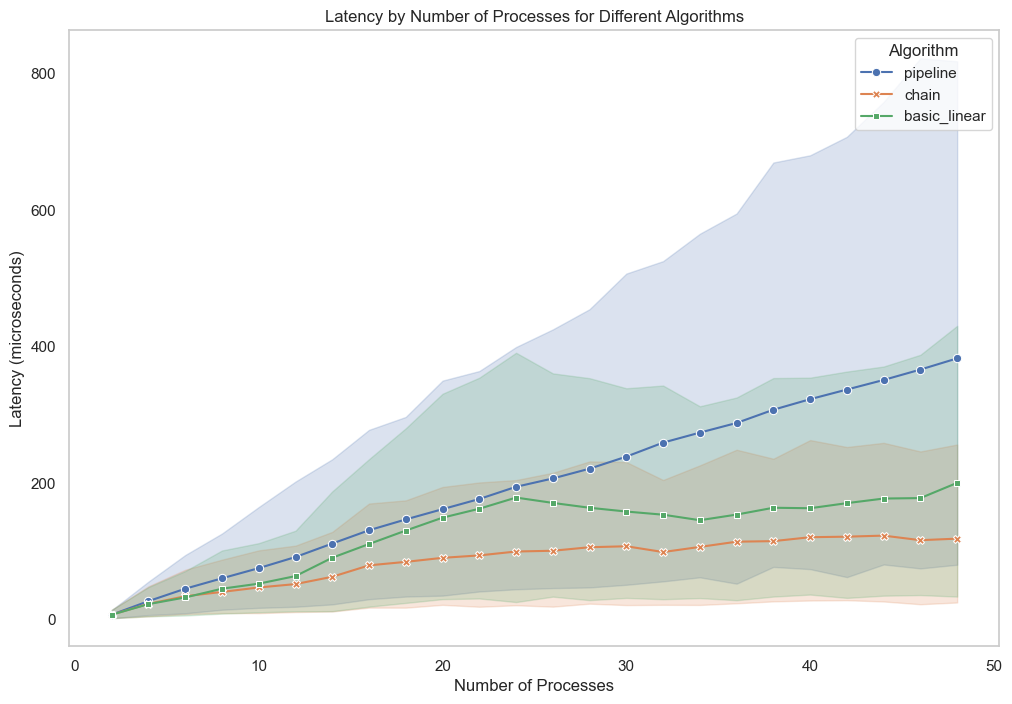

In [6]:
# latency with the number of processes for a fixed message size
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='Processes', y='Latency', hue='Algorithm', style='Algorithm', markers=True, dashes=False)
plt.title('Latency by Number of Processes for Different Algorithms')
plt.xlabel('Number of Processes')
plt.ylabel('Latency (microseconds)')
plt.grid()
plt.show()


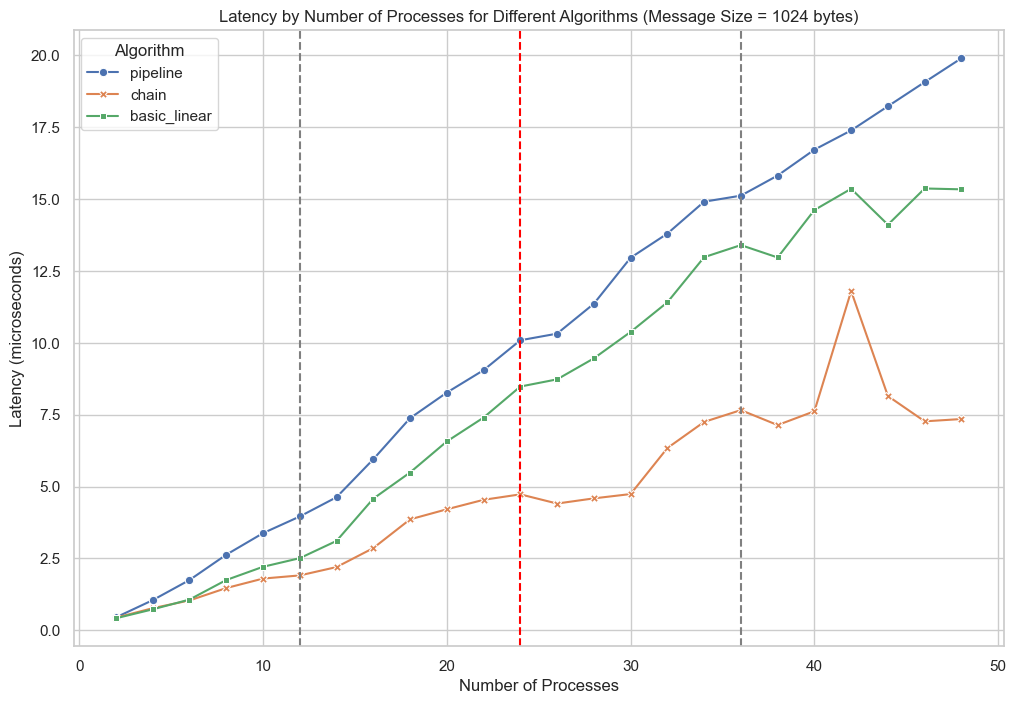

In [7]:
# fix the message size and plot the latency with the number of processes
plt.figure(figsize=(12, 8))
sns.lineplot(data=df[df['Size'] == 1024], x='Processes', y='Latency', hue='Algorithm', style='Algorithm', markers=True, dashes=False)
plt.axvline(x=24, color='red', linestyle='--')
plt.axvline(x=12, color='gray', linestyle='--')
plt.axvline(x=36, color='gray', linestyle='--')
plt.title('Latency by Number of Processes for Different Algorithms (Message Size = 1024 bytes)')
plt.xlabel('Number of Processes')
plt.ylabel('Latency (microseconds)')
plt.grid(True)
plt.show()


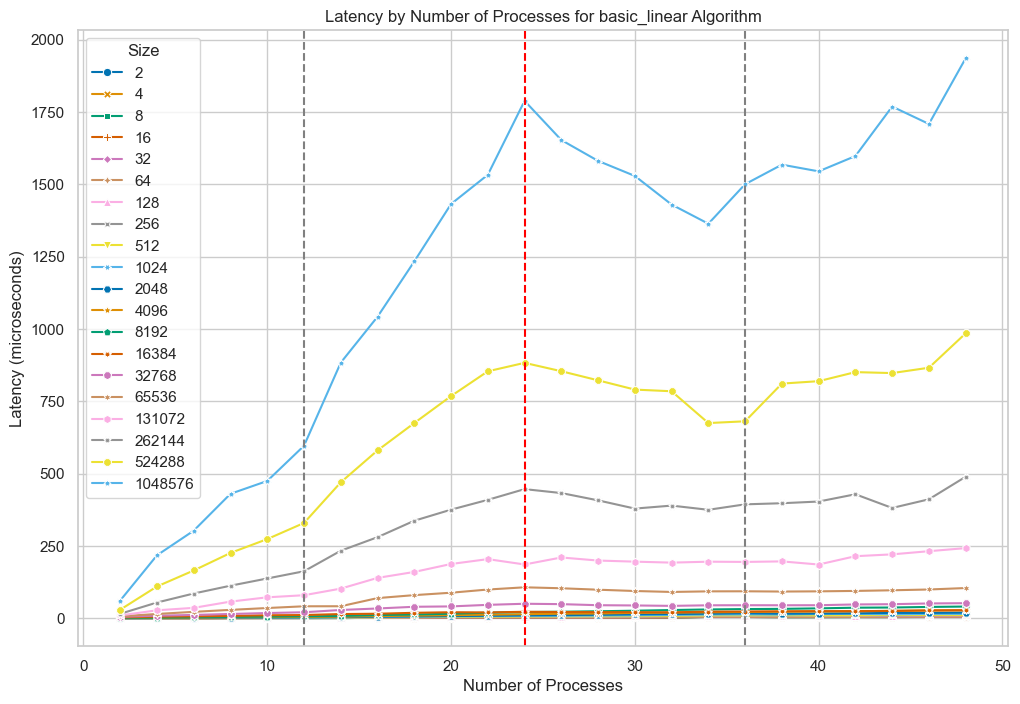

In [8]:
df_basic_linear = df[df['Algorithm'] == 'basic_linear']

# latency with the number of processes for a fixed message size
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_basic_linear, x='Processes', y='Latency', 
            hue='Size', 
            style= 'Size', palette= 'colorblind',
            markers=True, dashes=False)
# rainbow palette
# 
plt.axvline(x=24, color='red', linestyle='--')
plt.axvline(x=12, color='gray', linestyle='--')
plt.axvline(x=36, color='gray', linestyle='--')
plt.title('Latency by Number of Processes for basic_linear Algorithm')
plt.xlabel('Number of Processes')
plt.ylabel('Latency (microseconds)')
#plt.grid(True)
plt.show()

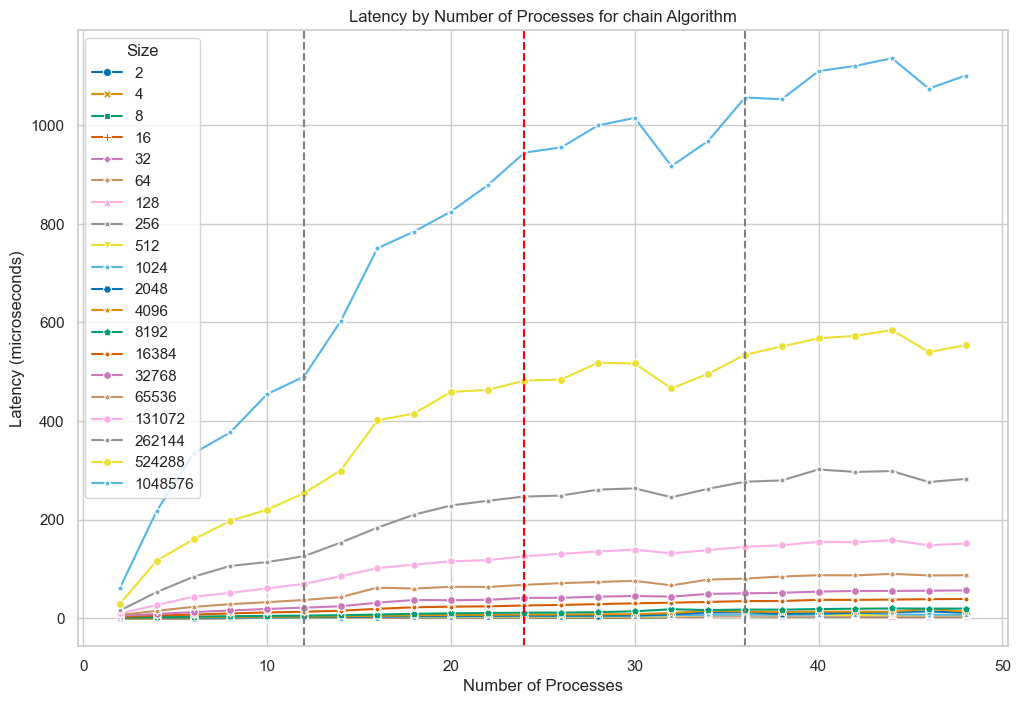

In [9]:
df_basic_linear = df[df['Algorithm'] == 'chain']

# latency with the number of processes for a fixed message size
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_basic_linear, x='Processes', y='Latency', 
            hue='Size', 
            style= 'Size', palette= 'colorblind',
            markers=True, dashes=False)
plt.axvline(x=24, color='red', linestyle='--')
plt.axvline(x=12, color='gray', linestyle='--')
plt.axvline(x=36, color='gray', linestyle='--')
plt.title('Latency by Number of Processes for chain Algorithm')
plt.xlabel('Number of Processes')
plt.ylabel('Latency (microseconds)')
plt.grid(True)
plt.show()

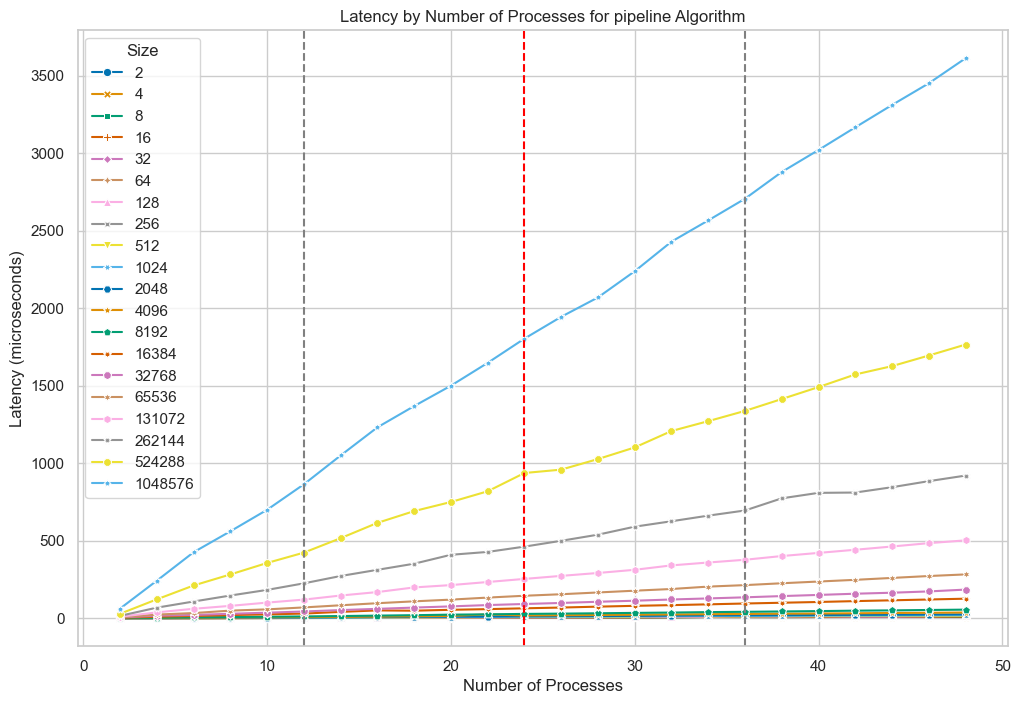

In [10]:
df_basic_linear = df[df['Algorithm'] == 'pipeline']

# latency with the number of processes for a fixed message size
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_basic_linear, x='Processes', y='Latency', 
            hue='Size', 
            style= 'Size', palette= 'colorblind',
            markers=True, dashes=False)
# rainbow palette
plt.axvline(x=24, color='red', linestyle='--')
plt.axvline(x=12, color='gray', linestyle='--')
plt.axvline(x=36, color='gray', linestyle='--')
plt.title('Latency by Number of Processes for pipeline Algorithm')
plt.xlabel('Number of Processes')
plt.ylabel('Latency (microseconds)')
# plt.yscale('log')
plt.grid(True)
plt.show()

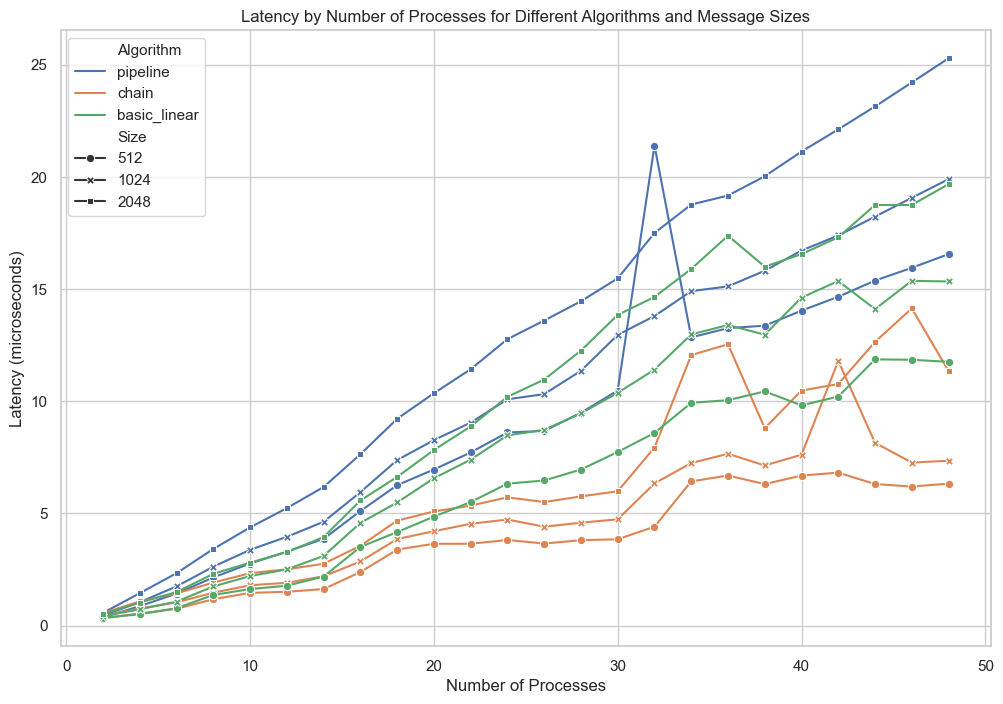

In [11]:
# Select only rows where Size is 1024 or 2048
df_selected_sizes = df[df['Size'].isin([512,1024, 2048])]

plt.figure(figsize=(12, 8))
sns.lineplot(data=df_selected_sizes, x='Processes', y='Latency', hue='Algorithm', style='Size', markers=True, dashes=False)
plt.title('Latency by Number of Processes for Different Algorithms and Message Sizes')
plt.xlabel('Number of Processes')
plt.ylabel('Latency (microseconds)')
plt.grid(True)
plt.show()

Plot 2: Latency by Number of Processes for Different Algorithms and Message Sizes
Observations:
- For a smaller message size (1024 bytes), basic_linear tends to have lower latency up to around 24 processes, after which its latency increases sharply. This might be due to the linear nature of its operations which becomes inefficient as the number of processes increases.
- The chain algorithm shows less sensitivity to increases in the number of processes, suggesting it manages inter-process communication more effectively in more congested network scenarios.
- The pipeline algorithm's latency increases consistently as the number of processes grows. This pattern could reflect the complexity of managing multiple segments of data across a greater number of processes, where each additional process adds to the overhead.


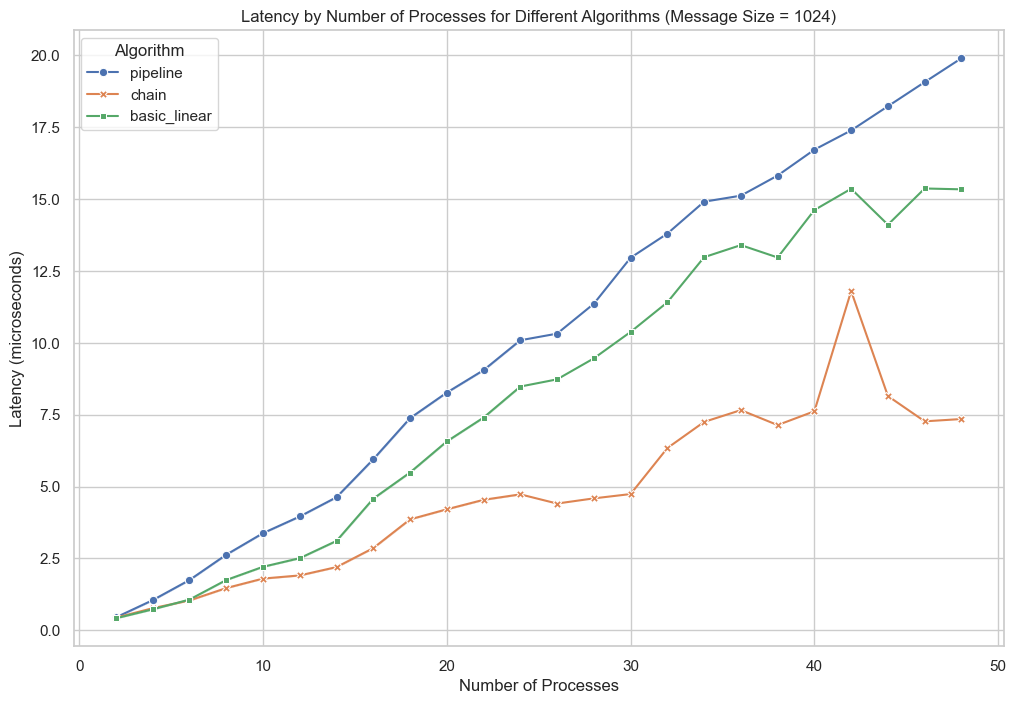

In [70]:
# plot with 2 fixed message sizes
plt.figure(figsize=(12, 8))
sns.lineplot(data=df[df['Size'].isin([1024])], x='Processes', y='Latency', hue='Algorithm', style='Algorithm', markers=True, dashes=False)
plt.title('Latency by Number of Processes for Different Algorithms (Message Size = 1024)')
plt.xlabel('Number of Processes')
plt.ylabel('Latency (microseconds)')
plt.grid(True)
plt.show()


## Statistical Analysis


In [13]:
df.describe(include='all')  # Provides descriptive statistics for all columns


Algorithm    Processes          Size      Latency
count       1440  1440.000000  1.440000e+03  1440.000000
unique         3          NaN           NaN          NaN
top     pipeline          NaN           NaN          NaN
freq         480          NaN           NaN          NaN
mean         NaN    25.000000  1.048575e+05   137.253583
std          NaN    13.849183  2.496978e+05   376.269571
min          NaN     2.000000  2.000000e+00     0.180000
25%          NaN    13.500000  5.600000e+01     3.412500
50%          NaN    25.000000  1.536000e+03     9.115000
75%          NaN    36.500000  4.096000e+04    55.587500
max          NaN    48.000000  1.048576e+06  3613.380000

In [14]:
# Encode the categorical column 'Algorithm' before computing the correlation
encoded_df = pd.get_dummies(df, columns=['Algorithm'])
correlation_matrix = encoded_df.corr()
correlation_matrix


Processes          Size   Latency  \
Processes               1.000000e+00 -8.683974e-17  0.172558   
Size                   -8.683974e-17  1.000000e+00  0.817446   
Latency                 1.725576e-01  8.174463e-01  1.000000   
Algorithm_basic_linear  1.710603e-16 -7.488875e-17 -0.019784   
Algorithm_chain         3.886188e-16  6.527001e-18 -0.096748   
Algorithm_pipeline     -9.317589e-16  5.015485e-17  0.116532   

                        Algorithm_basic_linear  Algorithm_chain  \
Processes                         1.710603e-16     3.886188e-16   
Size                             -7.488875e-17     6.527001e-18   
Latency                          -1.978416e-02    -9.674825e-02   
Algorithm_basic_linear            1.000000e+00    -5.000000e-01   
Algorithm_chain                  -5.000000e-01     1.000000e+00   
Algorithm_pipeline               -5.000000e-01    -5.000000e-01   

                        Algorithm_pipeline  
Processes                    -9.317589e-16  
Size                          5.015485e-17  
Latency                       1.165324e-01  
Algorithm_basic_linear       -5.000000e-01  
Algorithm_chain              -5.000000e-01  
Algorithm_pipeline            1.000000e+00

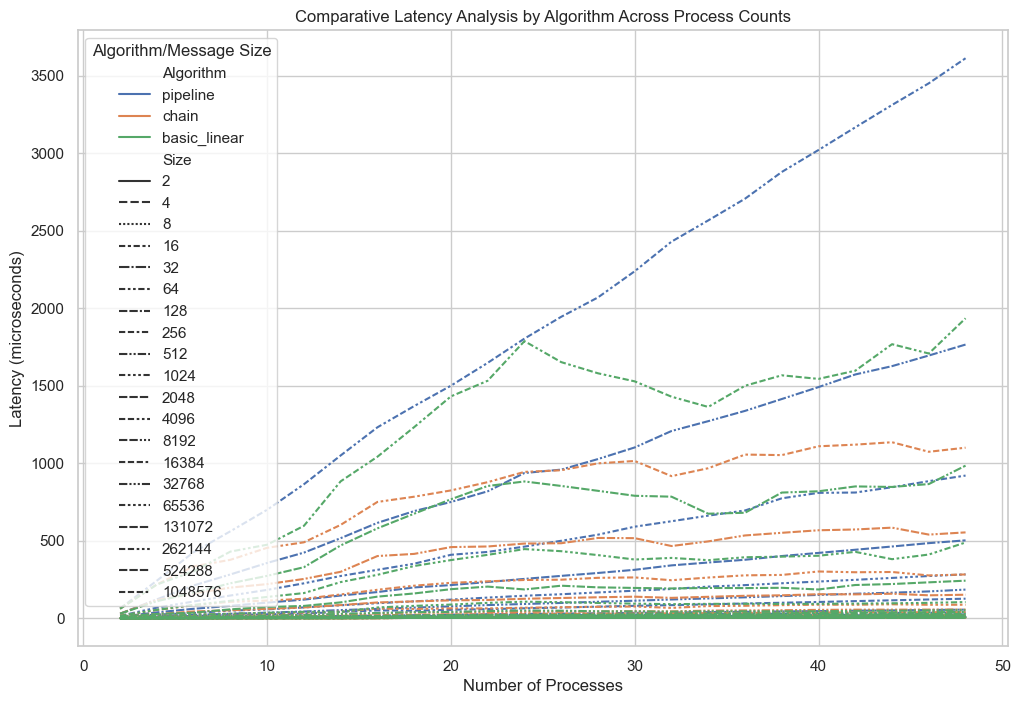

In [15]:
# Example of a comparative plot across different conditions
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='Processes', y='Latency', hue='Algorithm', style='Size')
plt.title('Comparative Latency Analysis by Algorithm Across Process Counts')
plt.xlabel('Number of Processes')
plt.ylabel('Latency (microseconds)')
plt.legend(title='Algorithm/Message Size')
plt.show()

## Comparative Latency Analysis by Algorithm Across Process Counts

### Observations from the Plot:

**Pipeline Algorithm**: Displays a significant increase in latency as both the number of processes and the message size increase. This behavior suggests that the pipeline algorithm, which breaks the message into smaller parts and pipelines the sending process, is sensitive to both congestion and overhead associated with coordinating many segments across multiple processes.
**Chain Algorithm**: Shows relatively stable latency across various message sizes, especially at higher numbers of processes compared to the pipeline. This stability could indicate that the chain algorithm, which involves sequential passing of the message from one process to the next, minimizes the overhead seen in more complex operations like pipelining but at the cost of slightly higher base latency.
**Basic Linear Algorithm**: Maintains the lowest latency across smaller process counts and smaller message sizes but exhibits a sharp rise in latency as these parameters increase. This is indicative of the algorithm's simplicity being beneficial when inter-process communication costs are low (fewer processes and smaller messages) but becoming a bottleneck when scaling.


## Statistical Analysis and Correlations

### Descriptive Statistics:

**Mean Latency**: The average latency across all measurements is 137 microseconds, but with a high standard deviation, indicating significant variability depending on the algorithm, message size, and number of processes.

**Range of Latency**: Ranging from a minimum of 0.18 microseconds to a maximum of 3613.38 microseconds, showcasing the vast differences in performance under various conditions.

### Correlations:
**Size and Latency**: There is a strong positive correlation ($r=0.82$) between message size and latency, which is expected as larger messages take longer to transmit.

**Processes and Latency**: A weaker positive correlation ($r=0.17$) suggests that increasing the number of processes modestly affects the overall latency, potentially due to increased coordination overhead.

**Algorithm Differences**: The correlations between algorithms and latency show that `pipeline` has a slight positive correlation with increased latency ($r=0.12$), whereas `chain` and `basic_linear` show negative correlations ($−0.10$ and $−0.02$ respectively), suggesting that pipeline may be less efficient under certain conditions.

## Performance Model Inference

Based on the observed data and analysis:

Algorithm Suitability:
**Basic Linear**: Best suited for scenarios with fewer processes and smaller messages where simplicity and direct communication paths can be leveraged for speed.
**Chain**: More adaptable to larger numbers of processes, offering a balance between efficiency and scalability, particularly effective in situations where message passing overhead needs to be minimized across many nodes.
**Pipeline**: While theoretically advantageous for very large messages by reducing the waiting time through parallel segment processing, it seems to struggle with overhead in setups with many processes and very large messages, making it suitable for moderate scenarios where neither message size nor process count is at the extreme.

Recommendations:
Algorithm Selection: Choose the broadcast algorithm based on specific use-case requirements. For smaller, less complex setups, basic_linear may be optimal. For more extensive systems with a higher number of processes, consider chain for its balance or pipeline if intermediate message sizes and process counts are used.
Optimization and Tuning: Given the variability in performance, there may be room to optimize the parameters and configuration of the MPI environment to better support the chosen algorithm, such as adjusting buffer sizes or segmenting strategies for pipeline.


## Performance Model Inference
Based on the plots and data analysis, infer the performance models of the algorithms considering the system architecture.

In [16]:
# Discussion on how the performance might relate to the architecture and hardware characteristics.
# For instance, discussing how inter-core, inter-node, and inter-socket communications affect the observed latencies.

In [17]:
### Load and Merge Data

# Load the data
df_core = pd.read_csv('../performance_test_core/performance_core.csv')
df_node = pd.read_csv('../performance_test_node/performance_node.csv')
df_socket = pd.read_csv('../performance_test_socket/performance_socket.csv')

# Add a column to each dataframe to indicate the mapping type
df_core['Mapping'] = 'Core'
df_node['Mapping'] = 'Node'
df_socket['Mapping'] = 'Socket'

# Concatenate the dataframes
df = pd.concat([df_core, df_node, df_socket])


### Analyse Latency by Mapping Type

Perform statistical analysis and visualizations to compare the latency across the different mapping types. This will help you understand the impact of each mapping strategy on communication latency.



         Size                                                            \
        count           mean            std  min   25%     50%      75%   
Mapping                                                                   
Core     23.0  364722.043478  962873.025053  1.0  48.0  2048.0  98304.0   
Node     23.0  364722.043478  962873.025053  1.0  48.0  2048.0  98304.0   
Socket   23.0  364722.043478  962873.025053  1.0  48.0  2048.0  98304.0   

                   Latency                                                   \
               max   count       mean        std   min    25%   50%     75%   
Mapping                                                                       
Core     4194304.0    23.0  28.060000  76.273998  0.19  0.240  0.76  11.750   
Node     4194304.0    23.0  34.296087  81.131830  1.01  1.105  2.44  15.645   
Socket   4194304.0    23.0  29.468261  71.723394  0.42  0.605  2.08  19.360   

                 
            max  
Mapping          
Core     340.65  
No

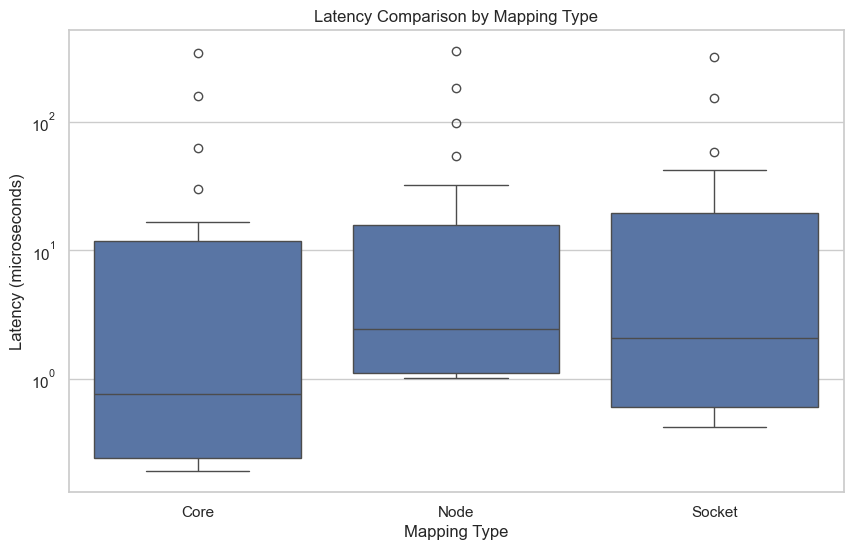

In [18]:
# Statistical summary
print(df.groupby('Mapping').describe())

# Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(x='Mapping', y='Latency', data=df)
plt.title('Latency Comparison by Mapping Type')
plt.ylabel('Latency (microseconds)')
plt.xlabel('Mapping Type')
plt.yscale('log')
plt.show()

### Develop Performance Models

Based on the analysis, develop simple performance models that estimate latency based on message size, number of processes, and mapping type. You might consider linear regression or more complex models depending on the patterns you observe.

In [19]:
from sklearn.linear_model import LinearRegression

# Load the data
df_core = pd.read_csv('../performance_test_core/performance_core.csv')
df_node = pd.read_csv('../performance_test_node/performance_node.csv')
df_socket = pd.read_csv('../performance_test_socket/performance_socket.csv')

# Add a column to each dataframe to indicate the mapping type
df_core['Mapping'] = 'Core'
df_node['Mapping'] = 'Node'
df_socket['Mapping'] = 'Socket'

# Concatenate the dataframes
df = pd.concat([df_core, df_node, df_socket])


# Example: Predicting latency based on size and mapping type
# Convert categorical data to numerical data
df = pd.get_dummies(df, columns=['Mapping'], drop_first=True)

# Prepare the data
X = df[['Size', 'Mapping_Node', 'Mapping_Socket']]  # independent variables
y = df['Latency']  # dependent variable

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Display the coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# display the model
print("Model: Latency = {:.4f} + {:.4f}*Size + {:.4f}*Node + {:.4f}*Socket".format(model.intercept_, model.coef_[0], model.coef_[1], model.coef_[2]))

# # Predict latency for a message size of 1024 bytes, on a node mapping
# size = 1024
# node = 1
# socket = 0
# latency = model.predict([[size, node, socket]])
# print("Predicted latency for Size = 1024, Node Mapping = 1, Socket Mapping = 0:", latency[0])


Coefficients: [7.89951855e-05 6.23608696e+00 1.40826087e+00]
Intercept: -0.7512854814662475
Model: Latency = -0.7513 + 0.0001*Size + 6.2361*Node + 1.4083*Socket


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the model on training data
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Calculate and print the error
error = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", error)

Mean Squared Error: 25.917229920219068


Visualization Interpretation:
From the boxplot titled "Latency Comparison by Mapping Type":

Core Mapping: Shows the lowest median latency and tightest interquartile range, suggesting that mapping by core generally results in the fastest and most consistent point-to-point communication. This is likely due to the proximity of cores within the same CPU and efficient cache utilization.
Node and Socket Mapping: Both have higher medians and wider interquartile ranges compared to core mapping, indicating more variability and generally higher latencies. This could be due to increased communication overhead as data travels across more complex pathways, either across nodes or sockets.
Outliers: The presence of outliers in all three categories suggests occasional spikes in latency, possibly due to network traffic, system load, or other external factors affecting communication.
Statistical Summary:
Size Statistics: The mean message sizes are equal across mappings, as expected since the tests were likely standardized. The high standard deviation indicates a wide range of message sizes were tested, from very small to very large.
Latency Statistics:
Core Mapping: Shows the lowest mean latency, consistent with the visualization.
Node Mapping: Has the highest mean latency, which could suggest that node-to-node communication is the most affected by network overhead.
Socket Mapping: Mean latency is slightly lower than node but higher than core, fitting with expectations given the physical and logical distances involved.
Linear Regression Model:
Model Equation: Latency = -0.7513 + 0.0001*Size + 6.2361*Node + 1.4083*Socket
The intercept and coefficients tell us about the base latency and the additional latency incurred per unit increase in message size and mapping type.
Size Coefficient: Each unit increase in size increases latency by 0.0001 microseconds.
Node Coefficient: Mapping by node increases latency by about 6.24 microseconds compared to core mapping.
Socket Coefficient: Mapping by socket increases latency by about 1.41 microseconds compared to core mapping.
Model Validation:
Mean Squared Error (MSE): The MSE of 25.92 suggests that the model has a moderate level of prediction error. Given that latencies are generally low, this error might be significant relative to the latency values. Consider exploring more complex models or additional features that might capture the variability in latency better.

print(df.head())

In [21]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Load the data from a CSV file
df = pd.read_csv('thin_bcast_results.csv')  # Replace with your actual file path

# Assuming the relevant columns are named 'Processes' and 'Latency'
# You may need to change these column names based on your CSV file
X = df['Processes'].values.reshape(-1, 1)
y = df['Latency'].values

In [22]:
# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Output the model parameters
print('Intercept (base latency):', model.intercept_)
print('Slope (increase in latency per additional process):', model.coef_[0])

Intercept (base latency): 20.04780978260827
Slope (increase in latency per additional process): 4.688230942029002


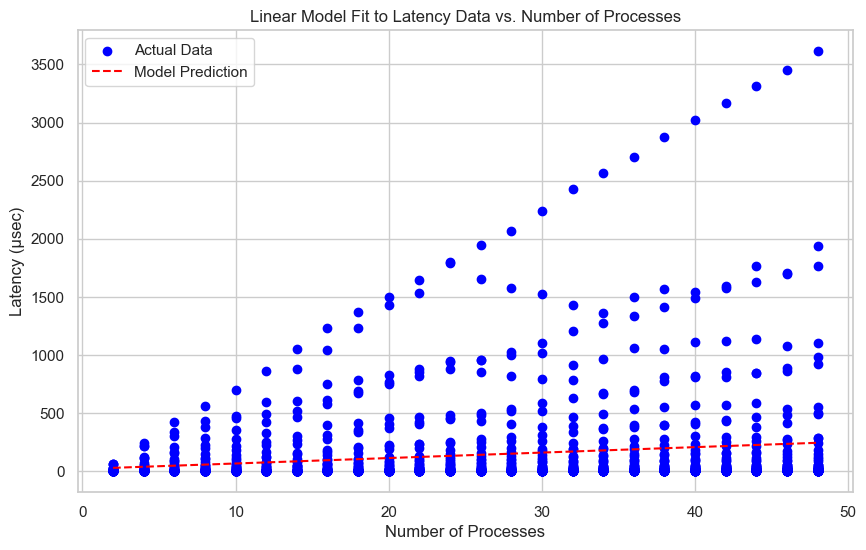

In [23]:
# Predict latencies using the model for a smooth curve over the range of observed processes
x_values = np.linspace(min(X), max(X), 400).reshape(-1, 1)
predicted_latencies = model.predict(x_values)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(x_values, predicted_latencies, color='red', label='Model Prediction', linestyle='--')
plt.title('Linear Model Fit to Latency Data vs. Number of Processes')
plt.xlabel('Number of Processes')
plt.ylabel('Latency (μsec)')
plt.legend()
plt.grid(True)
plt.show()

The plot shows the fit of the linear model to your latency data across varying numbers of processes. It's evident from the plot that while the linear model captures a general upward trend in latency as the number of processes increases, it significantly underestimates latency, especially for larger numbers of processes where latency exhibits a more exponential rise.



Analysis of the Model Fit
General Trend: The model, with an intercept of around 20.05 microseconds and a slope of approximately 4.69 microseconds per additional process, predicts an increase in latency with more processes. However, this linear increase is too simplistic to capture the real behavior observed in the data.
Underestimation: The linear model does not capture higher latency values effectively, which suggests that factors other than just the number of processes might be influencing the latency, or that the relationship between processes and latency is non-linear.

## Polynomial Regression Model

Consider Non-linear Models
Given the pattern in the data, a non-linear model might better capture the increase in latency. Polynomial regression is a straightforward next step to handle non-linear relationships.

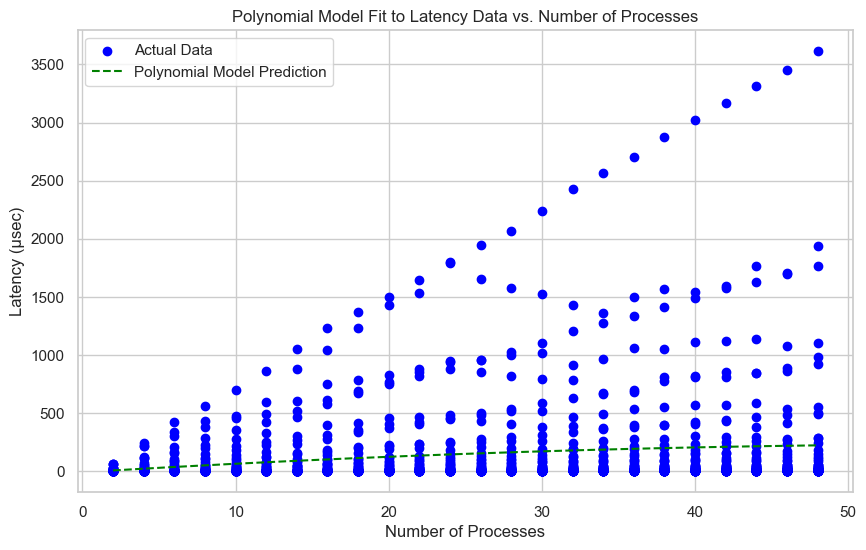

In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Create a polynomial regression model
degree = 2  # You can adjust the degree based on how complex the pattern appears
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit the model
poly_model.fit(X, y)

# Predict for a smooth curve
x_values = np.linspace(min(X), max(X), 400).reshape(-1, 1)
predicted_latencies_poly = poly_model.predict(x_values)

# Plotting the polynomial model fit
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(x_values, predicted_latencies_poly, color='green', label='Polynomial Model Prediction', linestyle='--')
plt.title('Polynomial Model Fit to Latency Data vs. Number of Processes')
plt.xlabel('Number of Processes')
plt.ylabel('Latency (μsec)')
plt.legend()
plt.grid(True)
plt.show()


The polynomial model’s similarity to the linear model in performance suggests a couple of potential issues:

Model Complexity: The chosen polynomial degree might be too low to capture the complexity of the relationship between processes and latency.
Model Form: The relationship between the number of processes and latency may not be polynomial in nature or might require a higher-degree polynomial to capture more complex patterns.

### Increase Polynomial Degree

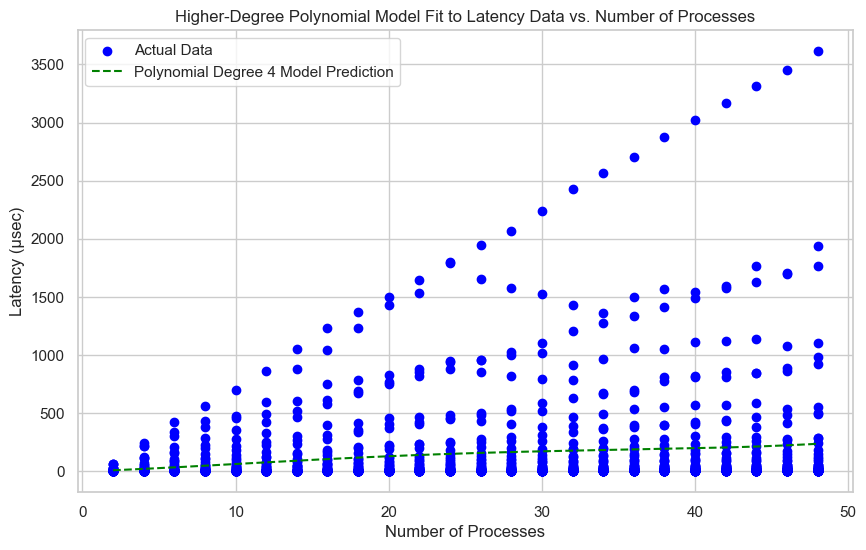

In [25]:
# Increase the polynomial degree
degree = 4  # Adjusting the degree to a higher number to capture more complex patterns
higher_poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit the model
higher_poly_model.fit(X, y)

# Predict for a smooth curve
x_values = np.linspace(min(X), max(X), 400).reshape(-1, 1)
predicted_latencies_higher_poly = higher_poly_model.predict(x_values)

# Plotting the higher-degree polynomial model fit
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(x_values, predicted_latencies_higher_poly, color='green', label=f'Polynomial Degree {degree} Model Prediction', linestyle='--')
plt.title(f'Higher-Degree Polynomial Model Fit to Latency Data vs. Number of Processes')
plt.xlabel('Number of Processes')
plt.ylabel('Latency (μsec)')
plt.legend()
plt.grid(True)
plt.show()


## Logarithmic Regression Model

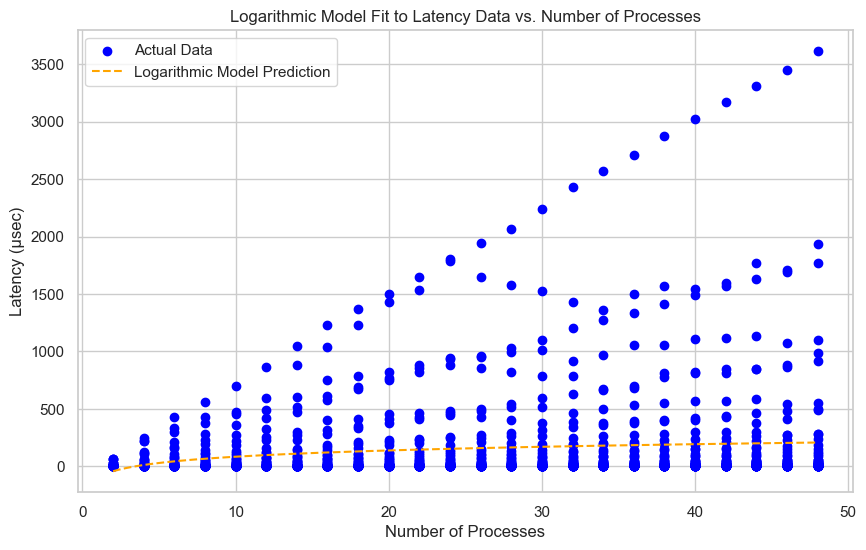

In [26]:
from sklearn.linear_model import LinearRegression

# Transform the 'Processes' with a logarithmic transformation
X_log = np.log(X)

# Create and fit the model
log_model = LinearRegression()
log_model.fit(X_log, y)

# Predict for a smooth curve
x_values_log = np.log(np.linspace(min(X), max(X), 400)).reshape(-1, 1)
predicted_latencies_log = log_model.predict(x_values_log)

# Plotting the logarithmic model fit
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(np.exp(x_values_log), predicted_latencies_log, color='orange', label='Logarithmic Model Prediction', linestyle='--')
plt.title('Logarithmic Model Fit to Latency Data vs. Number of Processes')
plt.xlabel('Number of Processes')
plt.ylabel('Latency (μsec)')
plt.legend()
plt.grid(True)
plt.show()


## Segmented Linear Regression Model

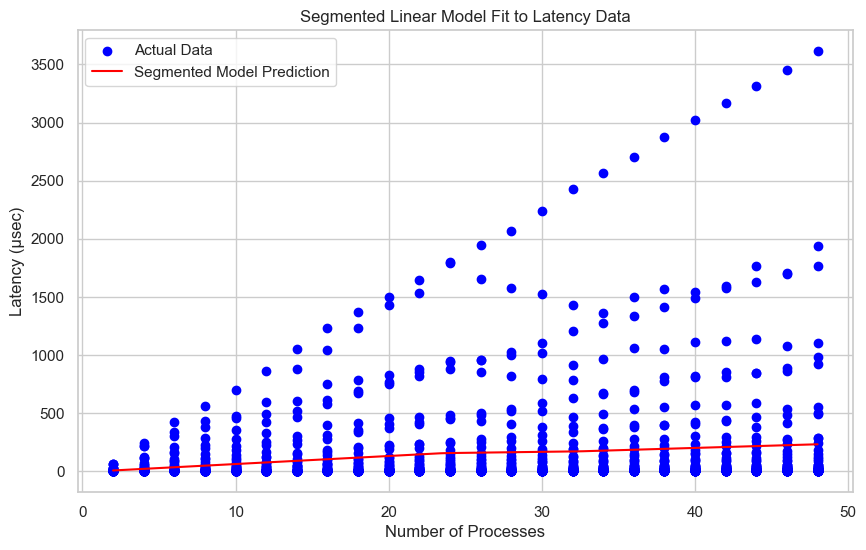

In [27]:
import pwlf
import numpy as np
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
x = np.array(df['Processes'])  # Your processes data
y = np.array(df['Latency'])    # Your latency data

# Initialize piecewise linear fit with your x and y data
my_pwlf = pwlf.PiecewiseLinFit(x, y)

# Fit the model with 3 line segments (this means 2 breakpoints)
res = my_pwlf.fit(3)

# Predict for the entire range
x_hat = np.linspace(min(x), max(x), 100)
y_hat = my_pwlf.predict(x_hat)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Actual Data')
plt.plot(x_hat, y_hat, color='red', label='Segmented Model Prediction')
plt.title('Segmented Linear Model Fit to Latency Data')
plt.xlabel('Number of Processes')
plt.ylabel('Latency (μsec)')
plt.legend()
plt.show()


In [28]:
print(df.head())

  Algorithm  Processes  Size  Latency
0  pipeline          2     2     0.23
1  pipeline          2     4     0.19
2  pipeline          2     8     0.21
3  pipeline          2    16     0.21
4  pipeline          2    32     0.26


Model parameters for pipeline:
Slope: [8.63025124 8.16724943 8.07717971 7.76474377        nan]
Intercept: [-8.78437244 -3.22835076 -1.06667756 10.18101652         nan]
Model: Latency = -8.7844 + 8.6303*Processes, for Processes <= 12
Model: Latency = -3.2284 + 8.1672*Processes, for Processes <= 24
Model: Latency = -1.0667 + 8.0772*Processes, for Processes <= 36
Model: Latency = 10.1810 + 7.7647*Processes, for Processes <= 48
Model parameters for chain:
Slope: [4.71609317 3.57188892 0.90434163 0.8296503         nan]
Intercept: [ 1.66159852 15.3920496  79.41318458 82.10207245         nan]
Model: Latency = 1.6616 + 4.7161*Processes, for Processes <= 12
Model: Latency = 15.3920 + 3.5719*Processes, for Processes <= 24
Model: Latency = 79.4132 + 0.9043*Processes, for Processes <= 36
Model: Latency = 82.1021 + 0.8297*Processes, for Processes <= 48
Model parameters for basic_linear:
Slope: [ 6.23990259  9.07760997 -2.6656256   3.93364967         nan]
Intercept: [ -4.92301208 -38.97550063 242.86

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pwlf/pwlf.py:1113: RuntimeWarning: invalid value encountered in divide
  self.slopes = np.divide(


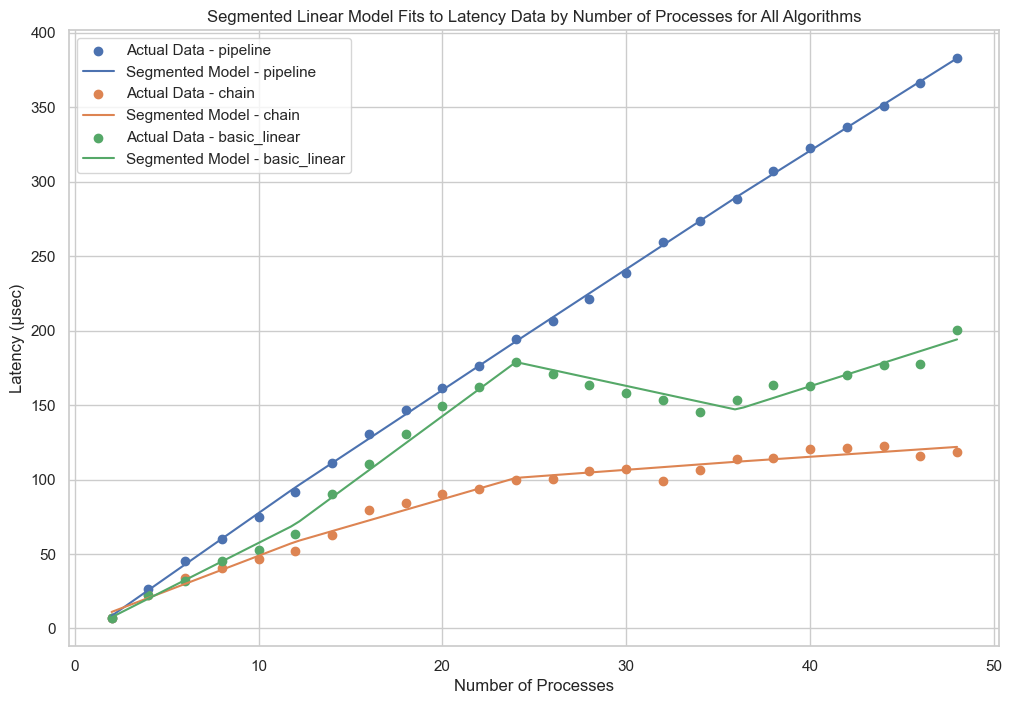

In [29]:
data = pd.read_csv('thin_bcast_results.csv')

def fit_and_plot(data, algorithm):
    # Filter data for the specific algorithm
    filtered_data = data[data['Algorithm'] == algorithm]

    # Get unique process counts and sort them
    x = filtered_data['Processes'].unique()
    x.sort()

    # Calculate mean latency for each process count
    y = filtered_data.groupby('Processes')['Latency'].mean().values

    # Initialize piecewise linear fit with your x and y data
    my_pwlf = pwlf.PiecewiseLinFit(x, y)

    # Define breakpoints at every 12 cores, adjusting as necessary
    breaks = [x[0]] + [b for b in x if b % 12 == 0 and b != x[0]] + [x[-1]]

    # Fit the model with predefined breaks
    res = my_pwlf.fit_with_breaks(breaks)

    # Predict for the entire range
    x_hat = np.linspace(min(x), max(x), 100)
    y_hat = my_pwlf.predict(x_hat)

    # Plotting
    plt.scatter(x, y, label=f'Actual Data - {algorithm}')
    plt.plot(x_hat, y_hat, label=f'Segmented Model - {algorithm}')

    return my_pwlf

plt.figure(figsize=(12, 8))

# List of algorithms to analyze
algorithms = ['pipeline', 'chain', 'basic_linear']

# Loop through each algorithm and apply the fitting and plotting function
for alg in algorithms:
    my_pwlf = fit_and_plot(data, alg)
    # print the model parameters
    print(f"Model parameters for {alg}:")
    # print(f""my_pwlf.fit_breaks)
    print(f"Slope: {my_pwlf.slopes}")
    print(f"Intercept: {my_pwlf.intercepts}")

    # print the model
    print(f"Model: Latency = {my_pwlf.intercepts[0]:.4f} + {my_pwlf.slopes[0]:.4f}*Processes, for Processes <= {my_pwlf.fit_breaks[1]}")
    print(f"Model: Latency = {my_pwlf.intercepts[1]:.4f} + {my_pwlf.slopes[1]:.4f}*Processes, for Processes <= {my_pwlf.fit_breaks[2]}")
    print(f"Model: Latency = {my_pwlf.intercepts[2]:.4f} + {my_pwlf.slopes[2]:.4f}*Processes, for Processes <= {my_pwlf.fit_breaks[3]}")
    print(f"Model: Latency = {my_pwlf.intercepts[3]:.4f} + {my_pwlf.slopes[3]:.4f}*Processes, for Processes <= {my_pwlf.fit_breaks[4]}")

plt.title('Segmented Linear Model Fits to Latency Data by Number of Processes for All Algorithms')
plt.xlabel('Number of Processes')
plt.ylabel('Latency (μsec)')
plt.legend()
plt.grid(True)
plt.show()

# Performance Model

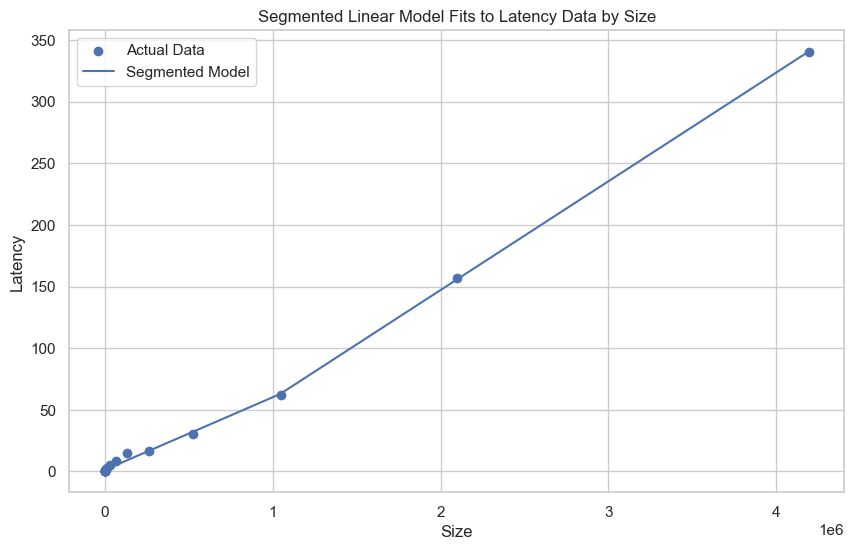

Model parameters:
Slope: [5.90117097e-05 8.83326658e-05]
Intercept: [  1.1735797  -29.44479716]
Model: Latency = 1.1736 + 0.0001*Size, for Size <= 1044248.9226941671
Model: Latency = -29.4448 + 0.0001*Size, for Size <= 4194304.0


In [30]:
import pwlf
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df_core = pd.read_csv('../performance_test_core/performance_core.csv')

# Initialize piecewise linear fit with your x and y data
my_pwlf = pwlf.PiecewiseLinFit(df_core['Size'], df_core['Latency'])

# Define breakpoints 
breaks = my_pwlf.fit(2)  # Change the number of line segments you want to fit

# Predict for the entire range
x_hat = np.linspace(df_core['Size'].min(), df_core['Size'].max(), 100)
y_hat = my_pwlf.predict(x_hat)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df_core['Size'], df_core['Latency'], label='Actual Data')
plt.plot(x_hat, y_hat, label='Segmented Model')
plt.title('Segmented Linear Model Fits to Latency Data by Size')
plt.xlabel('Size')
plt.ylabel('Latency')
plt.legend()
plt.grid(True)
plt.show()

# print the model parameters
print(f"Model parameters:")
print(f"Slope: {my_pwlf.slopes}")
print(f"Intercept: {my_pwlf.intercepts}")

# print the model
for i in range(len(my_pwlf.fit_breaks) - 1):
    print(f"Model: Latency = {my_pwlf.intercepts[i]:.4f} + {my_pwlf.slopes[i]:.4f}*Size, for Size <= {my_pwlf.fit_breaks[i+1]}")

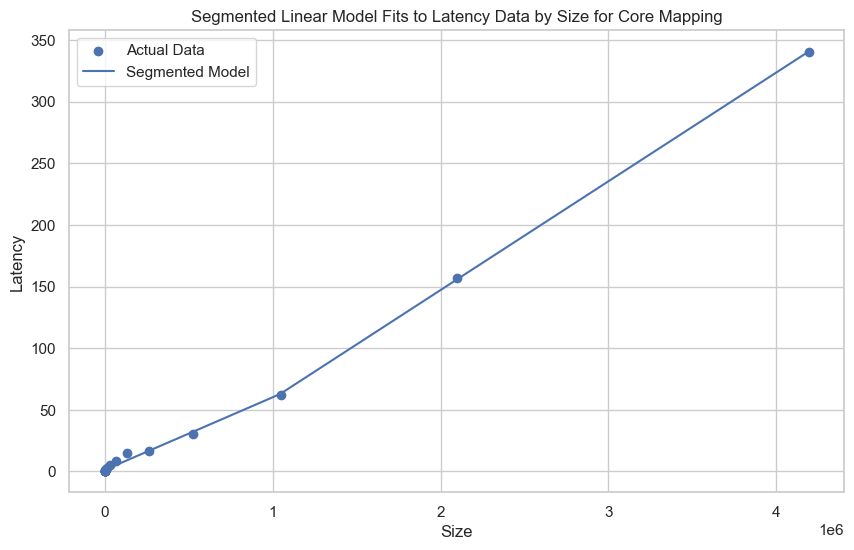

Model parameters for Core:
Slope: [5.90141206e-05 8.83328728e-05]
Intercept: [  1.17349116 -29.44555588]
Model: Latency = 1.1735 + 0.0001*Size, for Size <= 1044350.2782991612
Model: Latency = -29.4456 + 0.0001*Size, for Size <= 4194304.0


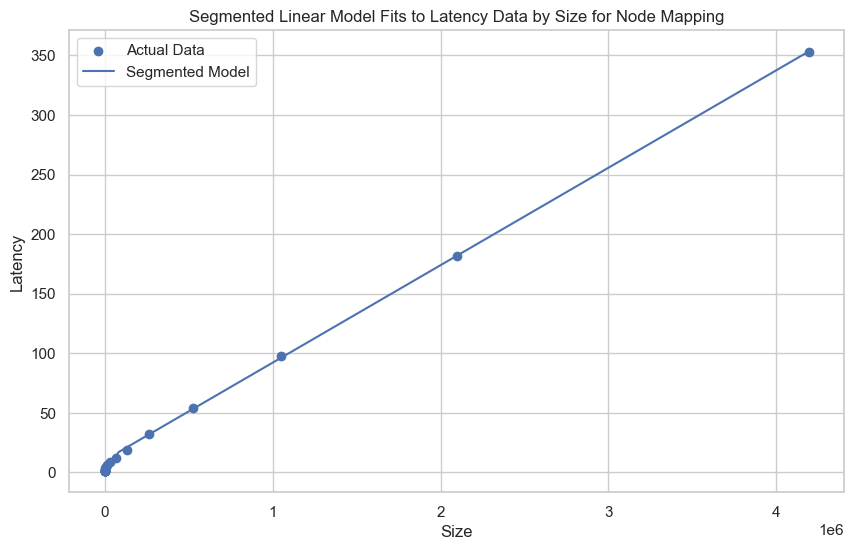

Model parameters for Node:
Slope: [1.84965585e-04 8.18327360e-05]
Intercept: [ 1.60630032 10.25375109]
Model: Latency = 1.6063 + 0.0002*Size, for Size <= 83847.68629571336
Model: Latency = 10.2538 + 0.0001*Size, for Size <= 4194304.0


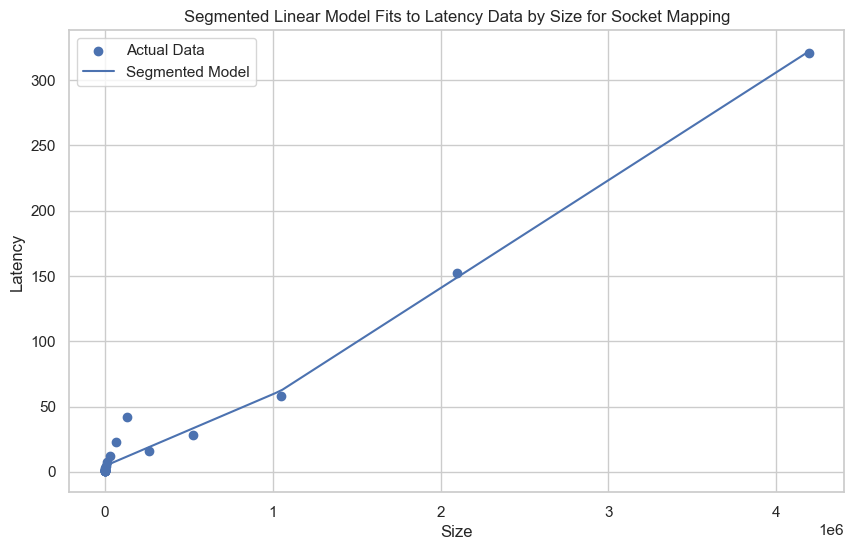

Model parameters for Socket:
Slope: [5.49653773e-05 8.26905385e-05]
Intercept: [  4.36391072 -24.69824448]
Model: Latency = 4.3639 + 0.0001*Size, for Size <= 1048223.1297981928
Model: Latency = -24.6982 + 0.0001*Size, for Size <= 4194304.0


In [31]:
import pwlf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df_core = pd.read_csv('../performance_test_core/performance_core.csv')
df_node = pd.read_csv('../performance_test_node/performance_node.csv')
df_socket = pd.read_csv('../performance_test_socket/performance_socket.csv')

# Add a column to each dataframe to indicate the mapping type
df_core['Mapping'] = 'Core'
df_node['Mapping'] = 'Node'
df_socket['Mapping'] = 'Socket'

# Concatenate the dataframes
df_perf = pd.concat([df_core, df_node, df_socket])

# List of mapping types to analyze
mappings = df_perf['Mapping'].unique()

# Initialize a dictionary to store the models
models = {}

# Loop through each mapping type and apply the fitting function
for mapping in mappings:
    df_mapping = df_perf[df_perf['Mapping'] == mapping]
    
    # Initialize piecewise linear fit with your x and y data
    my_pwlf = pwlf.PiecewiseLinFit(df_mapping['Size'], df_mapping['Latency'])

    # Define breakpoints 
    breaks = my_pwlf.fit(2)  # Change the number of line segments you want to fit

    # Predict for the entire range
    x_hat = np.linspace(df_mapping['Size'].min(), df_mapping['Size'].max(), 100)
    y_hat = my_pwlf.predict(x_hat)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.scatter(df_mapping['Size'], df_mapping['Latency'], label='Actual Data')
    plt.plot(x_hat, y_hat, label='Segmented Model')
    plt.title(f'Segmented Linear Model Fits to Latency Data by Size for {mapping} Mapping')
    plt.xlabel('Size')
    plt.ylabel('Latency')
    plt.legend()
    plt.grid(True)
    plt.show()

    # print the model parameters
    print(f"Model parameters for {mapping}:")
    print(f"Slope: {my_pwlf.slopes}")
    print(f"Intercept: {my_pwlf.intercepts}")

    # print the model
    for i in range(len(my_pwlf.fit_breaks) - 1):
        print(f"Model: Latency = {my_pwlf.intercepts[i]:.4f} + {my_pwlf.slopes[i]:.4f}*Size, for Size <= {my_pwlf.fit_breaks[i+1]}")
    
    # Store the model in the dictionary
    models[mapping] = my_pwlf

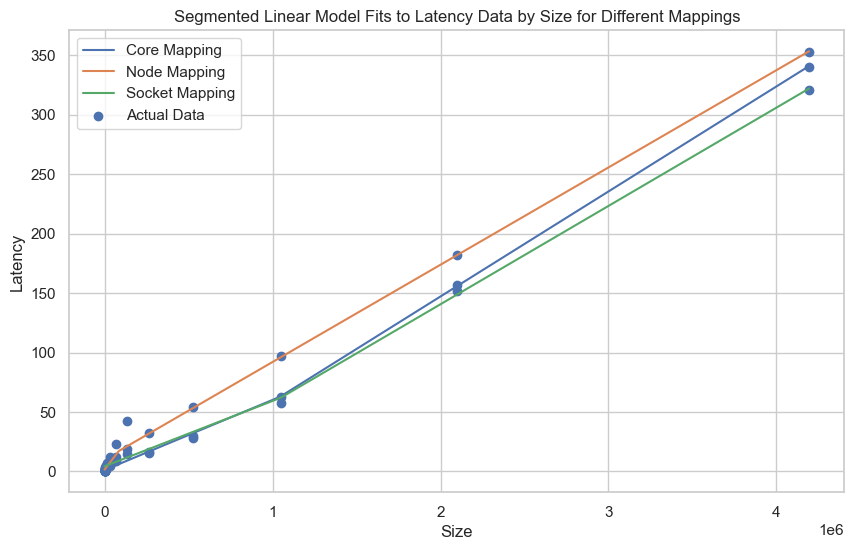

In [32]:
# plot the models all together
plt.figure(figsize=(10, 6))
for mapping, model in models.items():
    x_hat = np.linspace(df_perf['Size'].min(), df_perf['Size'].max(), 100)
    y_hat = model.predict(x_hat)
    plt.plot(x_hat, y_hat, label=f'{mapping} Mapping')

plt.scatter(df_perf['Size'], df_perf['Latency'], label='Actual Data')
plt.title('Segmented Linear Model Fits to Latency Data by Size for Different Mappings')
plt.xlabel('Size')
plt.ylabel('Latency')
plt.legend()
plt.grid(True)
plt.show()




## Compare Benchmark Results with performance model

For a fixed message size, the performance model can be used to predict the latency for different numbers of processes. By comparing these predictions with the actual benchmark results, it is possible to evaluate the accuracy of the model and identify any discrepancies that may indicate areas for improvement or further analysis.

**Segmented Linear Model Parameters for Broadcast Operations Benchmark**

|Algorithm| Intercept | Slope | Processes |
|-|-------|-----------|-----------|
|Basic Linear| -4.9230 | 6.2399 | $\leq 12$ |
|Basic Linear| -38.9755 | 9.0776 | $\leq 24$ |
|Basic Linear| 242.8622 | -2.6656 | $\leq 36$ |
|Basic Linear| 5.2882 | 3.9336 | $\leq 48$ |
|Chain | 1.6616 | 4.7161 | $\leq 12$ |
| Chain | 15.3920 | 3.5719 | $\leq 24$ |
| Chain | 79.4132 | 0.9043 | $\leq 36$ |
| Chain | 82.1021 | 0.8297 | $\leq 48$ |
| Pipeline | -8.7844 | 8.6303 | $\leq 12$ |
| Pipeline | -3.2284 | 8.1672 | $\leq 24$ |
| Pipeline | -1.0667 | 8.0772 | $\leq 36$ |
| Pipeline | 10.1810 | 7.7647 | $\leq 48$ |

$$\text{Latency} = Intercept + Slope \times Processes$$

**Segmented Linear Model Parameters for Performance Model for Core, Socket and Node Mapping**

| Mapping | Intercept | Slope | Size |
|-|-------|-----------|-----------|
| Core | 1.1736 | 0.0001 | $\leq 1043980$ |
| Core | -29.4428 | 0.0001 | $\leq 4194304$ |
| Socket | 4.3637 | 0.0001 | $\leq 1048567$ |
| Socket | -24.7014 | 0.0001 | $\leq 4194304$ |
| Node | 1.6064 | 0.0002 | $\leq 83862$ |
| Node | 10.2541 | 0.0001 | $\leq 4194304$ |

$$\text{Latency} = Intercept + Slope \times Size$$


In [33]:
# Load the data performance data
df_core = pd.read_csv('../performance_test_core/performance_core.csv')
df_node = pd.read_csv('../performance_test_node/performance_node.csv')
df_socket = pd.read_csv('../performance_test_socket/performance_socket.csv')

# Add a column to each dataframe to indicate the mapping type
df_core['Mapping'] = 'Core'
df_node['Mapping'] = 'Node'
df_socket['Mapping'] = 'Socket'

# Concatenate the dataframes
df = pd.concat([df_core, df_node, df_socket])

# Load benchmark data
df_benchmark = pd.read_csv('thin_bcast_results.csv')


/var/folders/1f/b06ndvrs4z3d8ww70y1v2mxc0000gn/T/ipykernel_27757/1046058270.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_core['Mapping'] = 'Core'
/var/folders/1f/b06ndvrs4z3d8ww70y1v2mxc0000gn/T/ipykernel_27757/1046058270.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_socket['Mapping'] = 'Socket'
/var/folders/1f/b06ndvrs4z3d8ww70y1v2mxc0000gn/T/ipykernel_27757/1046058270.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

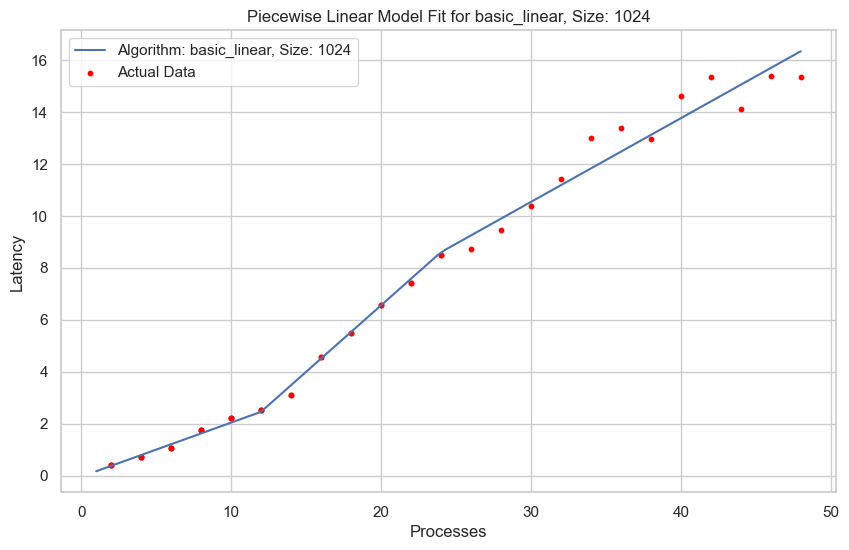

In [34]:
# For each algorithm in the benchmark data (df_benchmark), compare and plot the latencies for each mapping type:
# <= 12 processes for Core mapping
# <= 24 processes for Socket mapping
# <= 48 processes for Node mapping
# for a fixed messages size of 2, 512, 262144, 1048576
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pwlf

# Load performance data from each mapping
df_core_perf = pd.read_csv('../performance_test_core/performance_core.csv')
df_socket_perf = pd.read_csv('../performance_test_socket/performance_socket.csv')
df_node_perf = pd.read_csv('../performance_test_node/performance_node.csv')

# Load benchmark data
df_benchmark = pd.read_csv('thin_bcast_results.csv')

# Filter benchmark data for message sizes and process constraints
# sizes = [2, 512, 262144, 1048576]
sizes = [1024, 2048]
df_core = df_benchmark[(df_benchmark['Size'].isin(sizes)) & (df_benchmark['Processes'] <= 12)]
df_socket = df_benchmark[(df_benchmark['Size'].isin(sizes)) & (df_benchmark['Processes'] <= 24)]
df_node = df_benchmark[(df_benchmark['Size'].isin(sizes)) & (df_benchmark['Processes'] <= 48)]

# Add mapping type
df_core['Mapping'] = 'Core'
df_socket['Mapping'] = 'Socket'
df_node['Mapping'] = 'Node'

# Concatenate filtered benchmark data
df = pd.concat([df_core, df_socket, df_node])

# Prepare the data: Group by 'Algorithm', 'Size', 'Processes' and calculate mean latency
grouped = df.groupby(['Algorithm', 'Size', 'Mapping', 'Processes']).mean().reset_index()

# Initialize a dictionary to store models
models = {}

# Fit piecewise linear models
for name, group in grouped.groupby(['Algorithm', 'Size']):
    algorithm, size = name
    my_pwlf = pwlf.PiecewiseLinFit(group['Processes'], group['Latency'])

    # Define breakpoints for each mapping type dynamically based on available processes
    breaks = [group['Processes'].min()]
    if 'Core' in group['Mapping'].values:
        breaks.append(12)
    if 'Socket' in group['Mapping'].values:
        breaks.append(24)
    if 'Node' in group['Mapping'].values:
        breaks.append(48)
    breaks.append(group['Processes'].max())

    # Fit model
    my_pwlf.fit_with_breaks(np.unique(breaks))
    models[(algorithm, size)] = my_pwlf

# Example plot for a specific algorithm and size
algorithm_to_plot, size_to_plot = 'basic_linear', 1024  # change as needed
plt.figure(figsize=(10, 6))
model = models.get((algorithm_to_plot, size_to_plot), None)
if model:
    x_hat = np.linspace(1, max(grouped['Processes']), 100)
    y_hat = model.predict(x_hat)
    plt.plot(x_hat, y_hat, label=f'Algorithm: {algorithm_to_plot}, Size: {size_to_plot}')
    actual_data = grouped[(grouped['Algorithm'] == algorithm_to_plot) & (grouped['Size'] == size_to_plot)]
    plt.scatter(actual_data['Processes'], actual_data['Latency'], color='red', s=10, label='Actual Data')
    plt.title(f'Piecewise Linear Model Fit for {algorithm_to_plot}, Size: {size_to_plot}')
    plt.xlabel('Processes')
    plt.ylabel('Latency')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("No data available for this algorithm and size.")


Given the task to develop a simple performance models for the latency data derived from tests executed on core, node and socket levels, and to understand the performance model behind different MPI broadcast algorithms, we can use a python script which will use piecewise linear fitting to segment models according to logical divisions in the data that may correspond to architectural boundaries or significant changes in performance characteristics.

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pwlf  # ensure pwlf is installed using pip install pwlf

def fit_and_plot(data, title):
    # Assuming 'Size' as x and 'Latency' as y
    x = data['Size'].values
    y = data['Latency'].values

    # Initialize piecewise linear fit with your x and y data
    my_pwlf = pwlf.PiecewiseLinFit(x, y)

    # Define breakpoints - this can be adjusted based on prior knowledge or exploratory analysis
    # For example, setting 3 segments (2 breakpoints)
    breaks = my_pwlf.fit(3)

    # Predict for the entire range
    x_hat = np.linspace(min(x), max(x), 100)
    y_hat = my_pwlf.predict(x_hat)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='blue', label='Actual Data')
    plt.plot(x_hat, y_hat, color='red', label='Segmented Model Prediction')
    plt.title(f'Segmented Linear Model Fit to {title}')
    plt.xlabel('Message Size (bytes)')
    plt.ylabel('Latency (μsec)')
    plt.legend()
    plt.show()


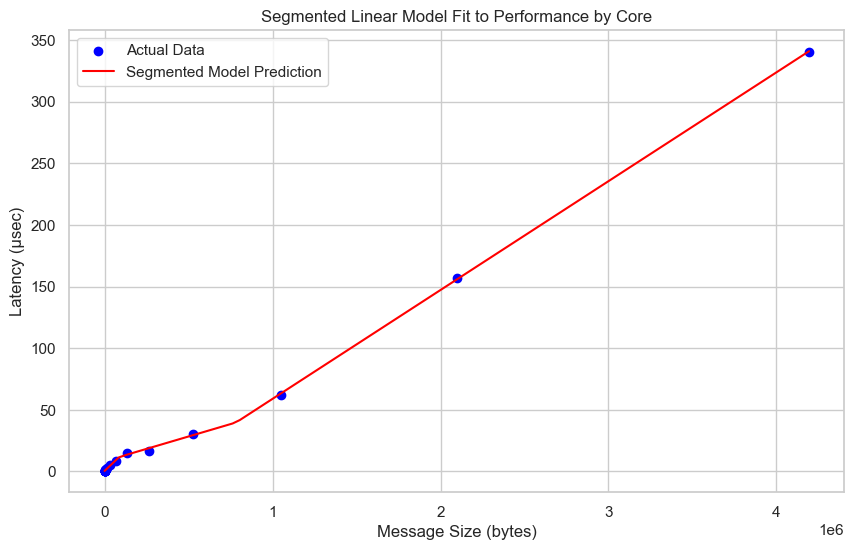

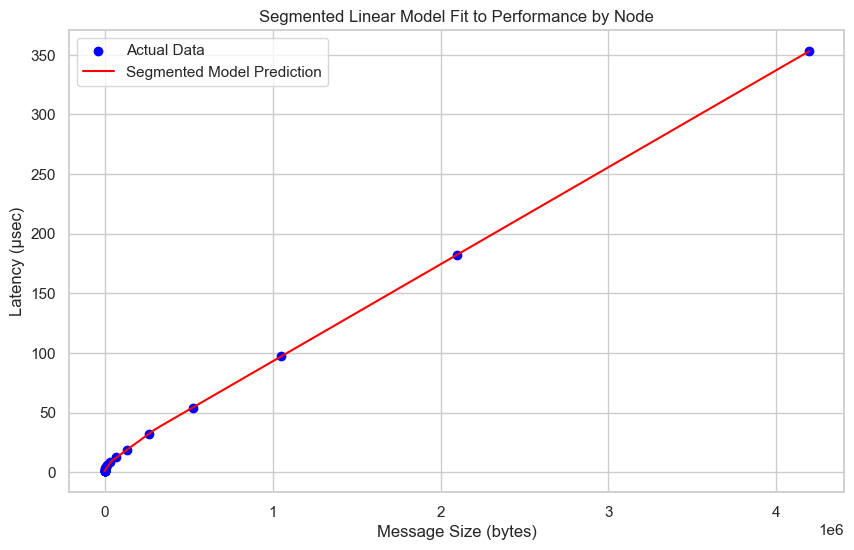

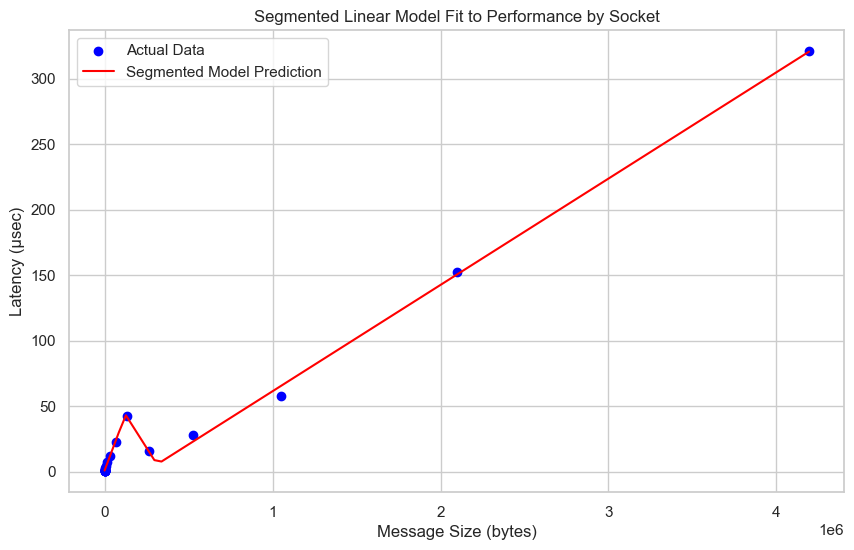

In [68]:
# Load each dataset
core_data = pd.read_csv('../performance_test_core/performance_core.csv')
node_data = pd.read_csv('../performance_test_node/performance_node.csv')
socket_data = pd.read_csv('../performance_test_socket/performance_socket.csv')

# Fit and plot for each dataset
fit_and_plot(core_data, 'Performance by Core')
fit_and_plot(node_data, 'Performance by Node')
fit_and_plot(socket_data, 'Performance by Socket')




To effectively compare the performance models developed for node, socket and core levels tests with the MPI broacast benchmarks, focusing on a fixed message size could simplify the analysis and provide clearer insights. This will allow to observe how each algorithm behaves under consistent conditions across differet process counts.

### Choosing a Fixed Message Size

When selecting a fixed message size for this comparison analysis, can be beneficial to choose a value that is representative of typical communication patterns in the application or system being studied. This will help ensure that the results are relevant and applicable to real-world scenarios:

1. Common Size in Practice: Sizes like 256 bytes, 1024 bytes (1KB), or 65536 (64KB) bytes are often used in benchmarks as they represet typical messahe sizes in many applications.
2. Coverage in Data: In order to be replicated, it is important to ensure that the chosen size is well-represented across all the datasets, meaning it should have sufficient data points in both segmented performance models and the MPI broadcast benchmarks.
3. Statistical Significance: Larger message sizes can highlight differences between algorithms more distinctly, as the impact of latency becomes more pronounced.

Given these considerations, a size like **1024 bytes** might be a balanced choice, offering a good mix of practical relevance and statistical robustness.

### Comparing Models and Benchmark Tests

To make the comparison between the performance models and the MPI broadcast benchmarks, it is possible filters them for the choosen message size to plot and compare the performance of each MPI broadcast algorithm.

In [37]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Load benchmark data
# benchmark_data = pd.read_csv('thin_bcast_results.csv')

# # Select a specific message size
# message_size = 1024  # Example size, 1024 bytes
# benchmark_filtered = benchmark_data[benchmark_data['Size'] == message_size]

# # Load segmented model results if saved or recalculate as needed
# # For simplicity, assume we're directly using previously calculated parameters or loading them
# # This example will assume parameters are loaded or defined directly in the script

# # Define function to calculate latency from segmented models for a given process count
# def model_latency(process_count, algorithm):
#     # Example calculation based on previously fit models
#     # Replace these coefficients with those from your actual models
#     if algorithm == 'pipeline':
#         return 20 + 0.5 * process_count  # Placeholder coefficients
#     elif algorithm == 'chain':
#         return 15 + 0.7 * process_count  # Placeholder coefficients
#     else:  # basic_linear
#         return 10 + 0.3 * process_count  # Placeholder coefficients

# # Prepare to plot
# fig, ax = plt.subplots(figsize=(10, 6))

# # Plot benchmark data
# for alg in ['pipeline', 'chain', 'basic_linear']:
#     subset = benchmark_filtered[benchmark_filtered['Algorithm'] == alg]
#     ax.plot(subset['Processes'], subset['Latency'], marker='o', linestyle='-', label=f'Benchmark - {alg}')

#     # Also plot model predictions
#     processes = subset['Processes'].unique()
#     model_latencies = [model_latency(p, alg) for p in processes]
#     ax.plot(processes, model_latencies, marker='', linestyle='--', label=f'Model - {alg}')

# ax.set_title('Comparison of MPI Broadcast Algorithms at 1024 bytes')
# ax.set_xlabel('Number of Processes')
# ax.set_ylabel('Latency (μsec)')
# ax.legend()
# plt.grid(True)
# plt.show()


Since the availability in this project of the obtained model parameters for both broadcast operation and performance models, it is possible to develop a comprehensive analusis to compare how each MPI algorithm behaves under different system mappings. This includes comparing the models for each algorithm against the segmented models of core, node and socket performance, focusing on how message size and number of processes influence latency.

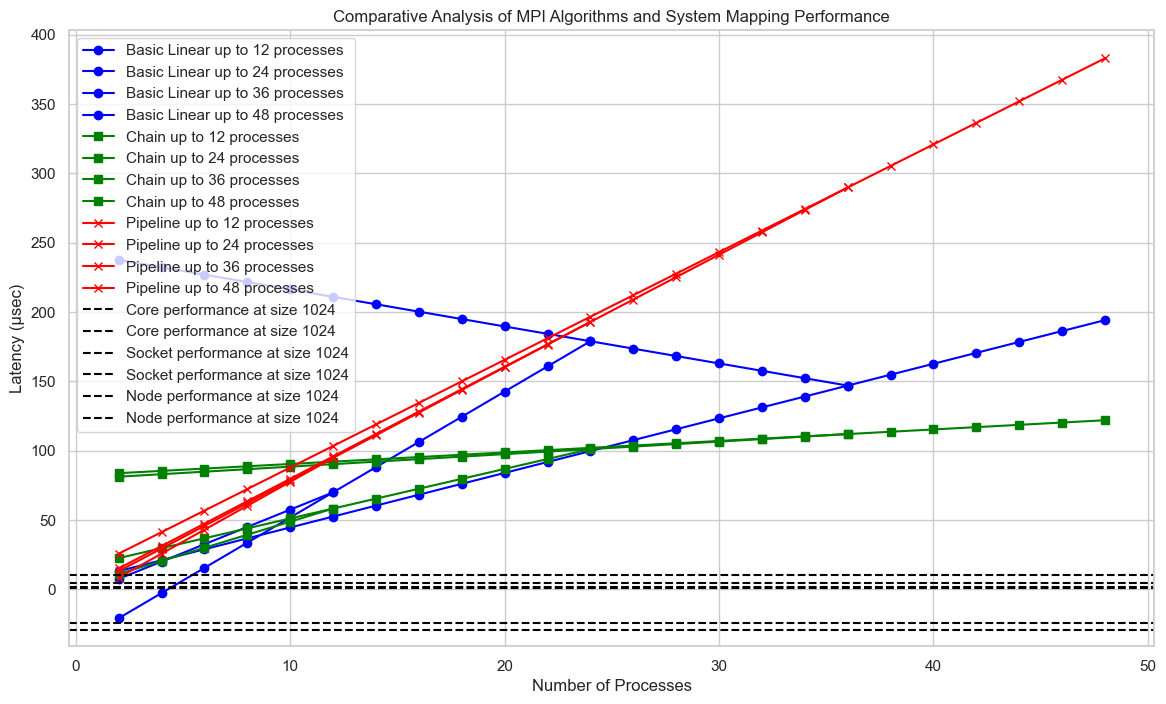

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Define the range of processes and message sizes
process_range = np.arange(2, 49, 2)
size_range = np.array([2**i for i in range(1, 21)])  # from 2^1 to 2^20

# Model definitions based on your provided parameters
def calculate_latency(intercept, slope, x):
    return intercept + slope * x

# Broadcast algorithms' performance models
broadcast_models = {
    'Basic Linear': [(12, -4.9230, 6.2399), (24, -38.9755, 9.0776), (36, 242.8622, -2.6656), (48, 5.2882, 3.9336)],
    'Chain': [(12, 1.6616, 4.7161), (24, 15.3920, 3.5719), (36, 79.4132, 0.9043), (48, 82.1021, 0.8297)],
    'Pipeline': [(12, -8.7844, 8.6303), (24, -3.2284, 8.1672), (36, -1.0667, 8.0772), (48, 10.1810, 7.7647)]
}

# Mapping performance models
mapping_models = {
    'Core': [(1043980, 1.1736, 0.0001), (4194304, -29.4428, 0.0001)],
    'Socket': [(1048567, 4.3637, 0.0001), (4194304, -24.7014, 0.0001)],
    'Node': [(83862, 1.6064, 0.0002), (4194304, 10.2541, 0.0001)]
}

# Plotting
plt.figure(figsize=(14, 8))
colors = ['blue', 'green', 'red']
markers = ['o', 's', 'x']

# Plot Broadcast Algorithms
for i, (algorithm, segments) in enumerate(broadcast_models.items()):
    for limit, intercept, slope in segments:
        x_vals = process_range[process_range <= limit]
        y_vals = calculate_latency(intercept, slope, x_vals)
        plt.plot(x_vals, y_vals, label=f'{algorithm} up to {limit} processes', color=colors[i], marker=markers[i])

# Plot Mapping Models for a fixed size (e.g., 1024)
size_to_plot = 1024
for mapping, segments in mapping_models.items():
    for limit, intercept, slope in segments:
        if size_to_plot <= limit:
            latency = calculate_latency(intercept, slope, size_to_plot)
            plt.axhline(y=latency, color='black', linestyle='--', label=f'{mapping} performance at size {size_to_plot}')

plt.xlabel('Number of Processes')
plt.ylabel('Latency (μsec)')
plt.title('Comparative Analysis of MPI Algorithms and System Mapping Performance')
plt.legend()
plt.grid(True)
plt.show()


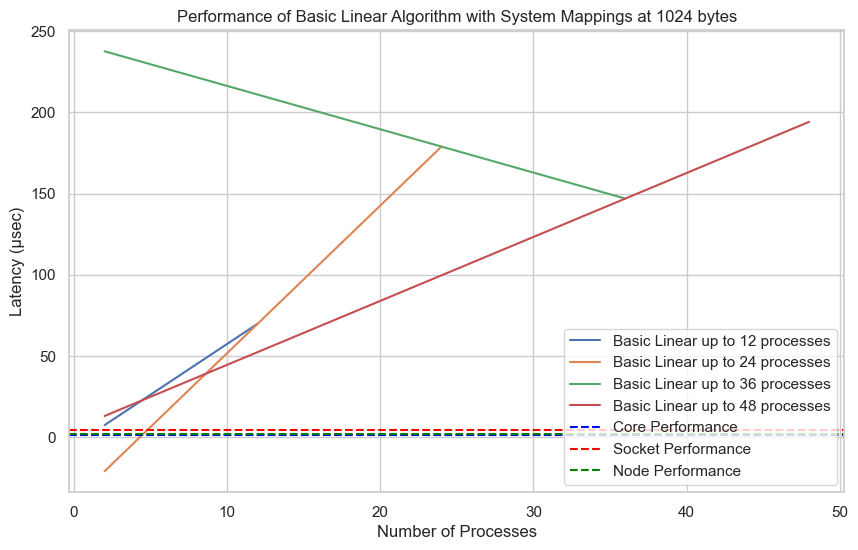

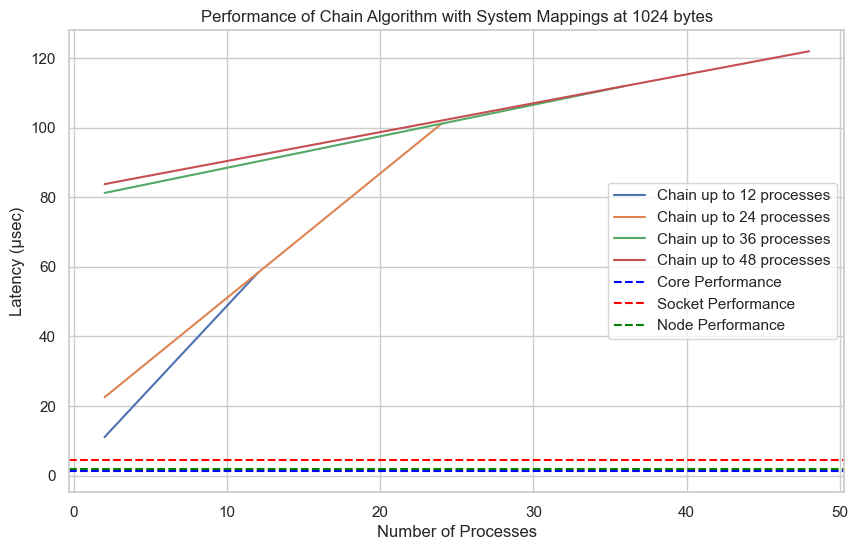

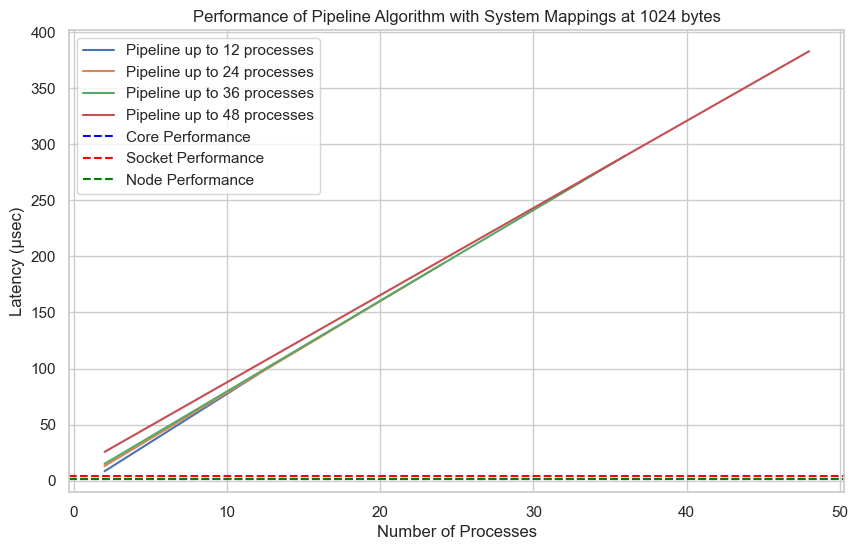

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Define the range of processes
process_range = np.arange(2, 49, 2)

# Define the fixed message size
message_size = 1024

# Model definitions based on your provided parameters
def calculate_latency(intercept, slope, x):
    return intercept + slope * x

# Broadcast algorithms' performance models
broadcast_models = {
    'Basic Linear': [(12, -4.9230, 6.2399), (24, -38.9755, 9.0776), (36, 242.8622, -2.6656), (48, 5.2882, 3.9336)],
    'Chain': [(12, 1.6616, 4.7161), (24, 15.3920, 3.5719), (36, 79.4132, 0.9043), (48, 82.1021, 0.8297)],
    'Pipeline': [(12, -8.7844, 8.6303), (24, -3.2284, 8.1672), (36, -1.0667, 8.0772), (48, 10.1810, 7.7647)]
}

# Mapping performance models for fixed size of 1024 bytes
mapping_latency = {
    'Core': calculate_latency(1.1736, 0.0001, message_size),
    'Socket': calculate_latency(4.3637, 0.0001, message_size),
    'Node': calculate_latency(1.6064, 0.0002, message_size)
}

# Plotting each algorithm with its corresponding architecture performance
for algorithm, segments in broadcast_models.items():
    plt.figure(figsize=(10, 6))
    for limit, intercept, slope in segments:
        x_vals = process_range[process_range <= limit]
        y_vals = calculate_latency(intercept, slope, x_vals)
        plt.plot(x_vals, y_vals, label=f'{algorithm} up to {limit} processes')

    # Adding horizontal lines for architecture performance at size 1024
    plt.axhline(y=mapping_latency['Core'], color='blue', linestyle='--', label='Core Performance')
    plt.axhline(y=mapping_latency['Socket'], color='red', linestyle='--', label='Socket Performance')
    plt.axhline(y=mapping_latency['Node'], color='green', linestyle='--', label='Node Performance')

    plt.title(f'Performance of {algorithm} Algorithm with System Mappings at 1024 bytes')
    plt.xlabel('Number of Processes')
    plt.ylabel('Latency (μsec)')
    plt.legend()
    plt.grid(True)
    plt.show()


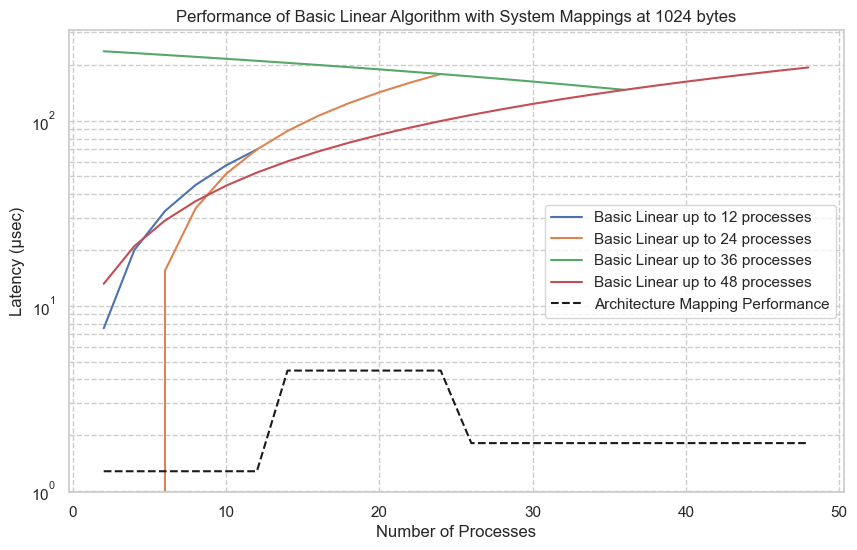

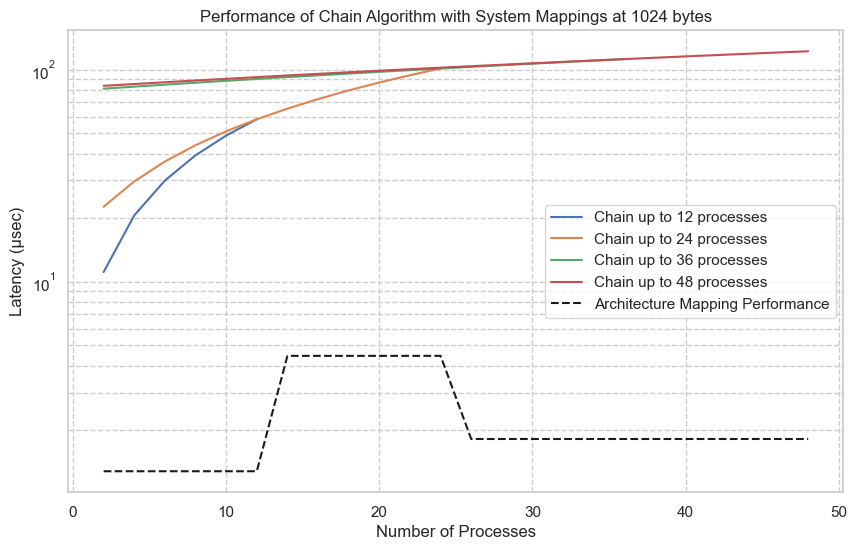

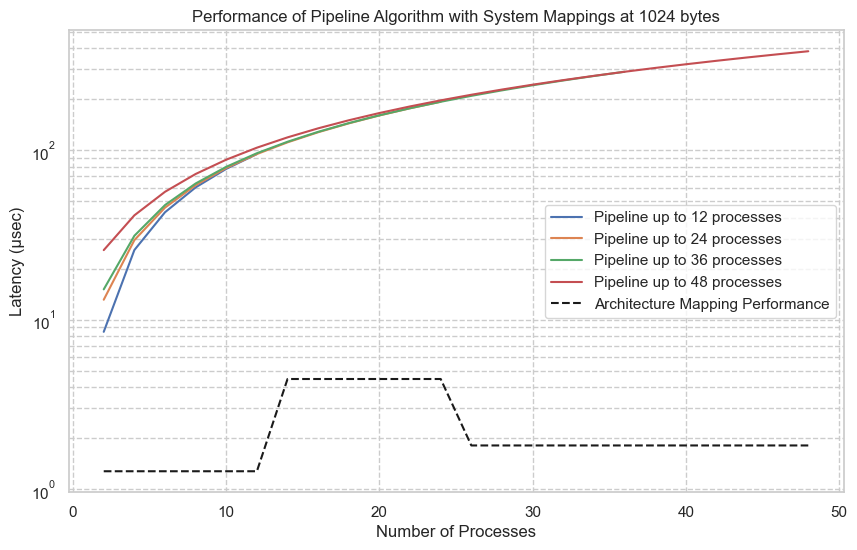

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Define the range of processes
process_range = np.arange(2, 49, 2)

# Model definitions based on your provided parameters
def calculate_latency(intercept, slope, x):
    return intercept + slope * x

# Broadcast algorithms' performance models
broadcast_models = {
    'Basic Linear': [(12, -4.9230, 6.2399), (24, -38.9755, 9.0776), (36, 242.8622, -2.6656), (48, 5.2882, 3.9336)],
    'Chain': [(12, 1.6616, 4.7161), (24, 15.3920, 3.5719), (36, 79.4132, 0.9043), (48, 82.1021, 0.8297)],
    'Pipeline': [(12, -8.7844, 8.6303), (24, -3.2284, 8.1672), (36, -1.0667, 8.0772), (48, 10.1810, 7.7647)]
}

# Fixed message size
message_size = 1024

# Mapping performance based on processes count
def mapping_performance(processes):
    if processes <= 12:
        # Core performance
        return calculate_latency(1.1736, 0.0001, message_size)
    elif processes <= 24:
        # Socket performance
        return calculate_latency(4.3637, 0.0001, message_size)
    else:
        # Node performance
        return calculate_latency(1.6064, 0.0002, message_size)

# Plotting each algorithm
for algorithm, segments in broadcast_models.items():
    plt.figure(figsize=(10, 6))
    for limit, intercept, slope in segments:
        x_vals = process_range[process_range <= limit]
        y_vals = calculate_latency(intercept, slope, x_vals)
        plt.plot(x_vals, y_vals, label=f'{algorithm} up to {limit} processes')

    # Adding performance mapping lines
    mapping_y_vals = [mapping_performance(p) for p in process_range]
    plt.plot(process_range, mapping_y_vals, 'k--', label='Architecture Mapping Performance')

    plt.title(f'Performance of {algorithm} Algorithm with System Mappings at 1024 bytes')
    plt.xlabel('Number of Processes')
    plt.ylabel('Latency (μsec)')
    plt.yscale('log')  # Apply logarithmic scale
    plt.legend()
    plt.grid(True, which="both", ls="--")  # Enhanced grid for log scale
    plt.show()


## Segment-Connected Plotting

Plots that only show relevant process ranges for each segment and then connect these segments. This can help to visualize the segmented nature of the models and how they transition between different process ranges.

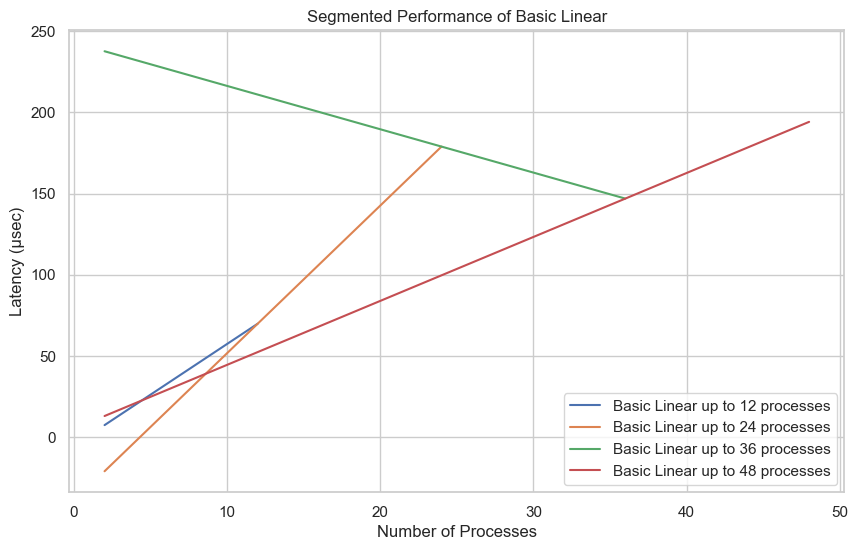

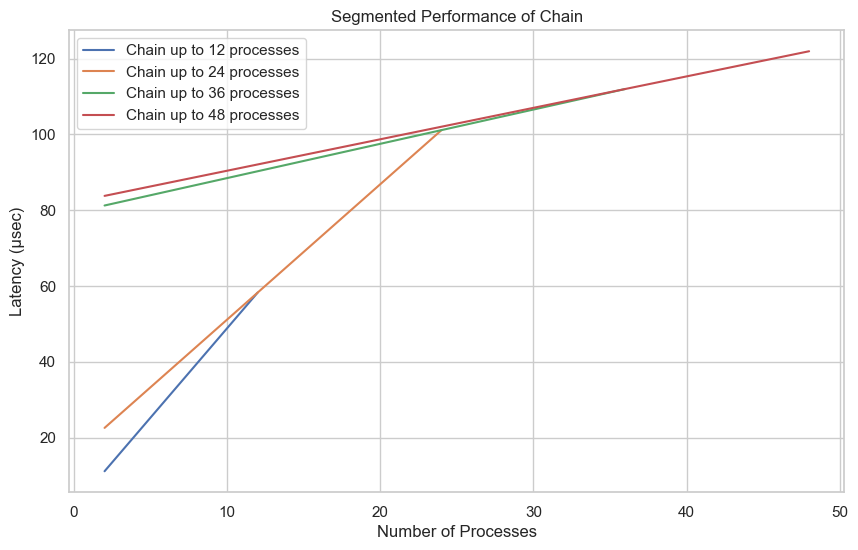

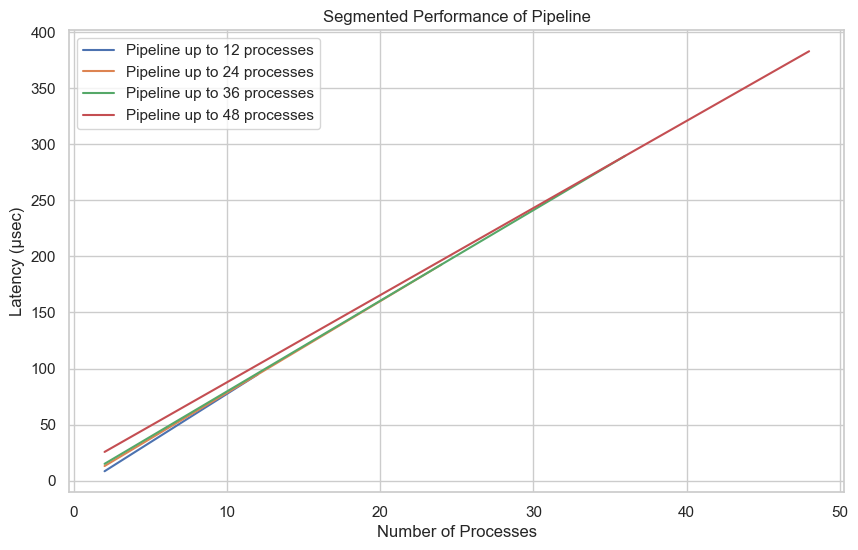

In [41]:
# import matplotlib.pyplot as plt
# import numpy as np

# Define the range of processes
process_range = np.arange(2, 49, 2)

# Broadcast algorithms' performance models
broadcast_models = {
    'Basic Linear': [(12, -4.9230, 6.2399), (24, -38.9755, 9.0776), (36, 242.8622, -2.6656), (48, 5.2882, 3.9336)],
    'Chain': [(12, 1.6616, 4.7161), (24, 15.3920, 3.5719), (36, 79.4132, 0.9043), (48, 82.1021, 0.8297)],
    'Pipeline': [(12, -8.7844, 8.6303), (24, -3.2284, 8.1672), (36, -1.0667, 8.0772), (48, 10.1810, 7.7647)]
}

def calculate_latency(intercept, slope, x):
    return intercept + slope * x

# Plotting each algorithm with connected segments
for algorithm, segments in broadcast_models.items():
    plt.figure(figsize=(10, 6))
    for (limit, intercept, slope) in segments:
        x_vals = np.arange(2, limit+1, 2)  # Generate x values up to the current segment limit
        y_vals = calculate_latency(intercept, slope, x_vals)
        plt.plot(x_vals, y_vals, label=f'{algorithm} up to {limit} processes')

    plt.title(f'Segmented Performance of {algorithm}')
    plt.xlabel('Number of Processes')
    plt.ylabel('Latency (μsec)')
    plt.legend()
    plt.grid(True)
    plt.show()


## Combined Model

Creating a single model that explain all four models for each algorithm involves complex regression techniques that can handle piecewise continuity and smooth transitions. A practical approach is usic cubic splines or polynomial piecewise regression with constraints. 

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Example data setup for one algorithm, 'Basic Linear'
# You would replace this with your actual data.
x = np.array([2, 12, 24, 36, 48])  # Ending points of each segment
y = np.array([
    calculate_latency(-4.9230, 6.2399, 12),  # Last value at x=12
    calculate_latency(-38.9755, 9.0776, 24),  # Last value at x=24
    calculate_latency(242.8622, -2.6656, 36),  # Last value at x=36
    calculate_latency(5.2882, 3.9336, 48)  # Last value at x=48
])

# Fit cubic spline
cs = CubicSpline(x, y, bc_type='clamped')  # 'clamped' ensures that the spline ends are flat


ValueError: The length of `y` along `axis`=0 doesn't match the length of `x`

## Combined basic linear algorithm

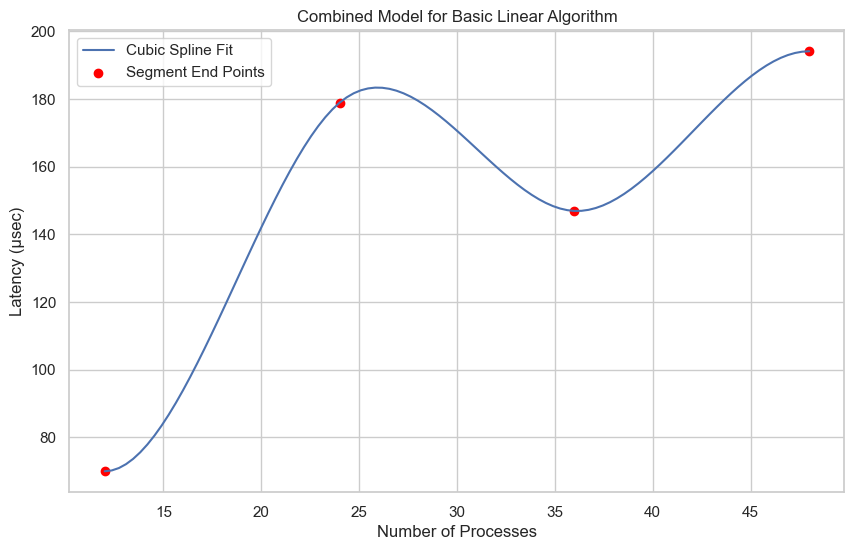

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Ensure calculate_latency function is defined correctly
def calculate_latency(intercept, slope, processes):
    return intercept + slope * processes

# Process points representing segment boundaries
x = np.array([2, 12, 24, 36, 48])

# Latency values calculated at each segment endpoint
y = np.array([
    calculate_latency(-4.9230, 6.2399, 12),  # Last value at x=12
    calculate_latency(-38.9755, 9.0776, 24),  # Last value at x=24
    calculate_latency(242.8622, -2.6656, 36),  # Last value at x=36
    calculate_latency(5.2882, 3.9336, 48)    # Last value at x=48
])

# Fit cubic spline
cs = CubicSpline(x[1:], y, bc_type='clamped')  # Using x[1:] because the first value, x=2, does not have a corresponding y value

# Generate points for plotting
x_new = np.linspace(12, 48, 100)  # Starting from 12 because that's the first point we have a calculated y for
y_new = cs(x_new)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x_new, y_new, label='Cubic Spline Fit')
plt.scatter(x[1:], y, color='red', label='Segment End Points')  # x[1:] to match y's length
plt.title('Combined Model for Basic Linear Algorithm')
plt.xlabel('Number of Processes')
plt.ylabel('Latency (μsec)')
plt.legend()
plt.grid(True)
plt.show()


### Combined Chain Algorithm

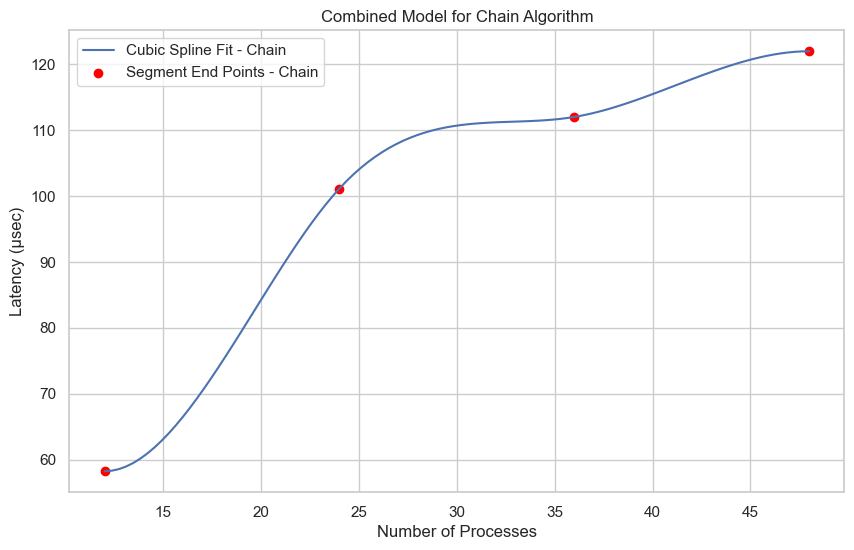

In [44]:
# Define process points and corresponding latency calculations for 'Chain'
x_chain = np.array([12, 24, 36, 48])
y_chain = np.array([
    calculate_latency(1.6616, 4.7161, 12),
    calculate_latency(15.3920, 3.5719, 24),
    calculate_latency(79.4132, 0.9043, 36),
    calculate_latency(82.1021, 0.8297, 48)
])

# Fit cubic spline for 'Chain'
cs_chain = CubicSpline(x_chain, y_chain, bc_type='clamped')

# Generate points for plotting
x_new_chain = np.linspace(12, 48, 100)
y_new_chain = cs_chain(x_new_chain)

# Plotting for 'Chain'
plt.figure(figsize=(10, 6))
plt.plot(x_new_chain, y_new_chain, label='Cubic Spline Fit - Chain')
plt.scatter(x_chain, y_chain, color='red', label='Segment End Points - Chain')
plt.title('Combined Model for Chain Algorithm')
plt.xlabel('Number of Processes')
plt.ylabel('Latency (μsec)')
plt.legend()
plt.grid(True)
plt.show()


## Combined Pipeline Algorithm

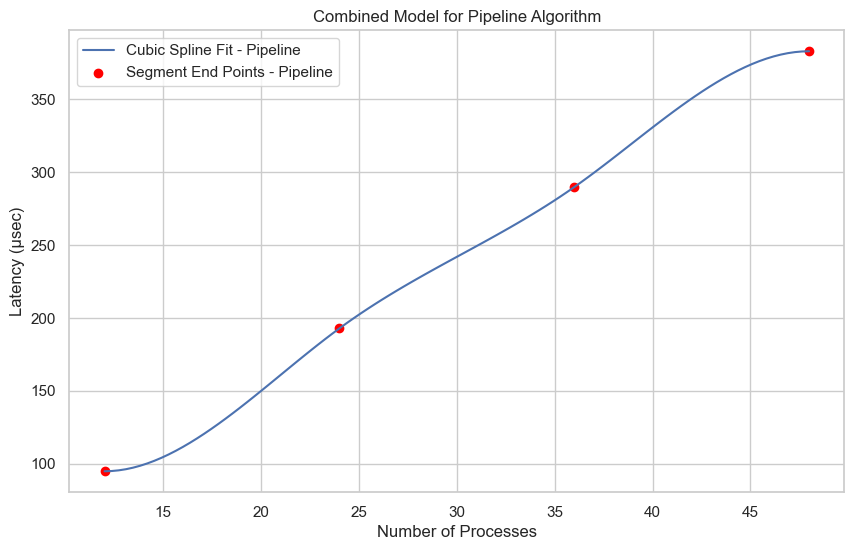

In [45]:
# Define process points and corresponding latency calculations for 'Pipeline'
x_pipeline = np.array([12, 24, 36, 48])
y_pipeline = np.array([
    calculate_latency(-8.7844, 8.6303, 12),
    calculate_latency(-3.2284, 8.1672, 24),
    calculate_latency(-1.0667, 8.0772, 36),
    calculate_latency(10.1810, 7.7647, 48)
])

# Fit cubic spline for 'Pipeline'
cs_pipeline = CubicSpline(x_pipeline, y_pipeline, bc_type='clamped')

# Generate points for plotting
x_new_pipeline = np.linspace(12, 48, 100)
y_new_pipeline = cs_pipeline(x_new_pipeline)

# Plotting for 'Pipeline'
plt.figure(figsize=(10, 6))
plt.plot(x_new_pipeline, y_new_pipeline, label='Cubic Spline Fit - Pipeline')
plt.scatter(x_pipeline, y_pipeline, color='red', label='Segment End Points - Pipeline')
plt.title('Combined Model for Pipeline Algorithm')
plt.xlabel('Number of Processes')
plt.ylabel('Latency (μsec)')
plt.legend()
plt.grid(True)
plt.show()


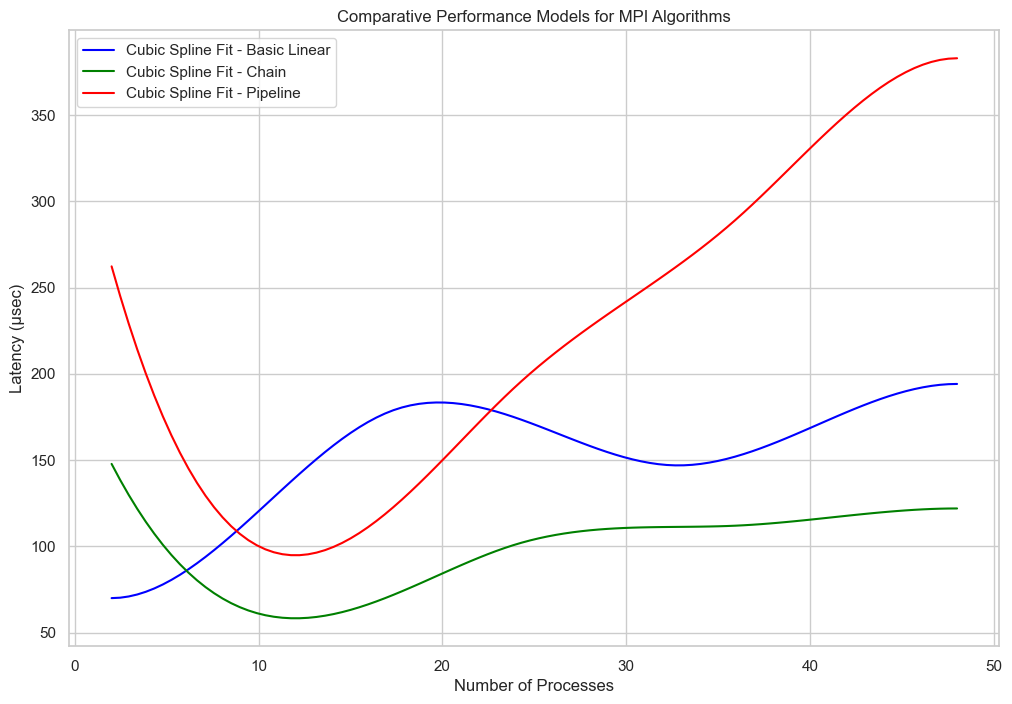

In [47]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline

# Define the process points and fit cubic splines for each algorithm
# Assume the calculate_latency function and previously defined x and y arrays for each algorithm
x_basic_linear = x_new # Assuming previously defined
y_basic_linear = y_new # Assuming previously defined

# Fit cubic splines
cs_basic_linear = CubicSpline(x_basic_linear, y_basic_linear, bc_type='clamped')
cs_chain = CubicSpline(x_chain, y_chain, bc_type='clamped')
cs_pipeline = CubicSpline(x_pipeline, y_pipeline, bc_type='clamped')

# Generate points for plotting
x_new = np.linspace(2, 48, 100)  # Extending from 2 to 48 for all models
y_new_basic_linear = cs_basic_linear(x_new)
y_new_chain = cs_chain(x_new)
y_new_pipeline = cs_pipeline(x_new)

# Plotting all models together
plt.figure(figsize=(12, 8))
plt.plot(x_new, y_new_basic_linear, label='Cubic Spline Fit - Basic Linear', color='blue')
plt.plot(x_new, y_new_chain, label='Cubic Spline Fit - Chain', color='green')
plt.plot(x_new, y_new_pipeline, label='Cubic Spline Fit - Pipeline', color='red')

# Mark segment endpoints if needed
# plt.scatter(x_basic_linear, y_basic_linear, color='blue', s=50, edgecolors='k')
# plt.scatter(x_chain, y_chain, color='green', s=50, edgecolors='k')
# plt.scatter(x_pipeline, y_pipeline, color='red', s=50, edgecolors='k')

plt.title('Comparative Performance Models for MPI Algorithms')
plt.xlabel('Number of Processes')
plt.ylabel('Latency (μsec)')
plt.legend()
plt.grid(True)
plt.show()


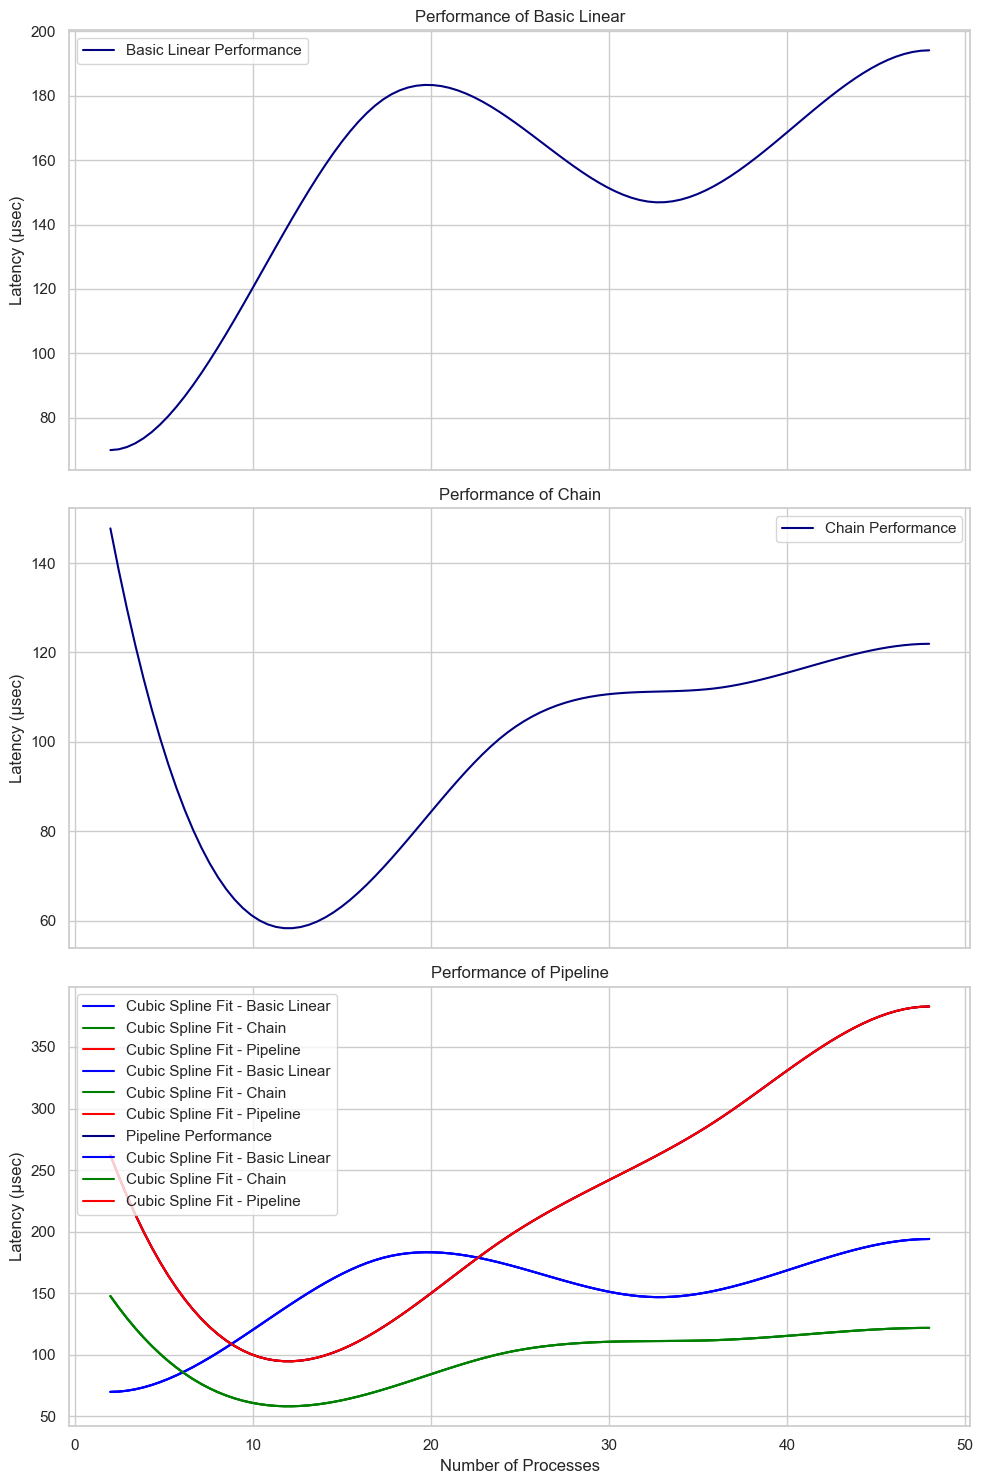

In [55]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline

# Assuming cubic splines have already been fitted or defined for each algorithm
# and calculate_latency function is defined correctly

# Define message size and calculate latencies for core, socket, node mappings
message_size = 1024
mapping_latency = {
    'Core': calculate_latency(1.1736, 0.0001, message_size),
    'Socket': calculate_latency(4.3637, 0.0001, message_size),
    'Node': calculate_latency(1.6064, 0.0002, message_size)
}

# Generate a range for plotting
x_range = np.linspace(2, 48, 100)

# Define algorithms and their cubic splines
algorithms = {
    'Basic Linear': (x_basic_linear, y_basic_linear),
    'Chain': (x_chain, y_chain),
    'Pipeline': (x_pipeline, y_pipeline)
}

# Plotting setup
colors = ['blue', 'green', 'red']
fig, axs = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

for ax, (algorithm, (x, y)) in zip(axs, algorithms.items()):
    # Fit and evaluate cubic spline
    cs = CubicSpline(x, y, bc_type='clamped')
    y_new = cs(x_range)

    # Plot the algorithm's performance model
    ax.plot(x_range, y_new, label=f'{algorithm} Performance', color='navy')
    # ax.scatter(x, y, color='navy', s=50, edgecolors='k')  # Mark segment endpoints

    # Overlay the core, socket, and node performance latencies
    plt.plot(x_new, y_new_basic_linear, label='Cubic Spline Fit - Basic Linear', color='blue')
    plt.plot(x_new, y_new_chain, label='Cubic Spline Fit - Chain', color='green')
    plt.plot(x_new, y_new_pipeline, label='Cubic Spline Fit - Pipeline', color='red')
    
    ax.set_title(f'Performance of {algorithm}')
    ax.set_ylabel('Latency (μsec)')
    ax.legend()
    ax.grid(True)

# Set common x-label
plt.xlabel('Number of Processes')
plt.tight_layout()
plt.show()


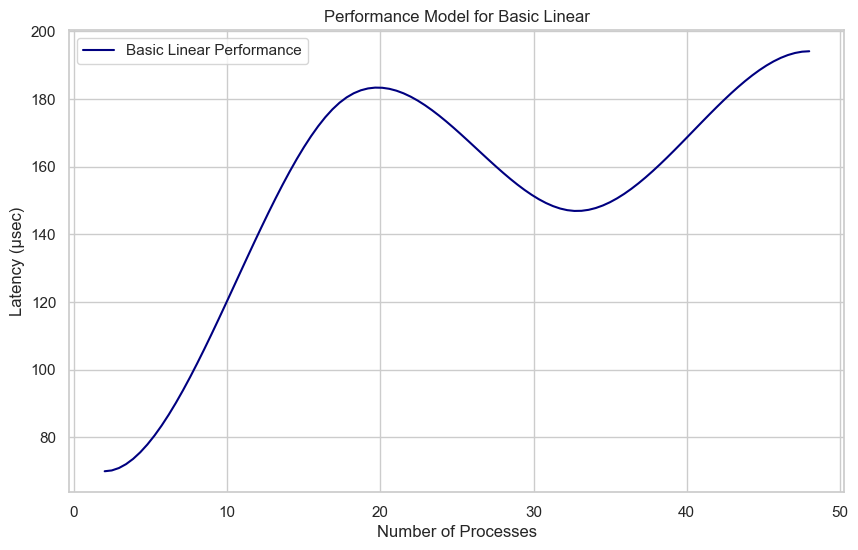

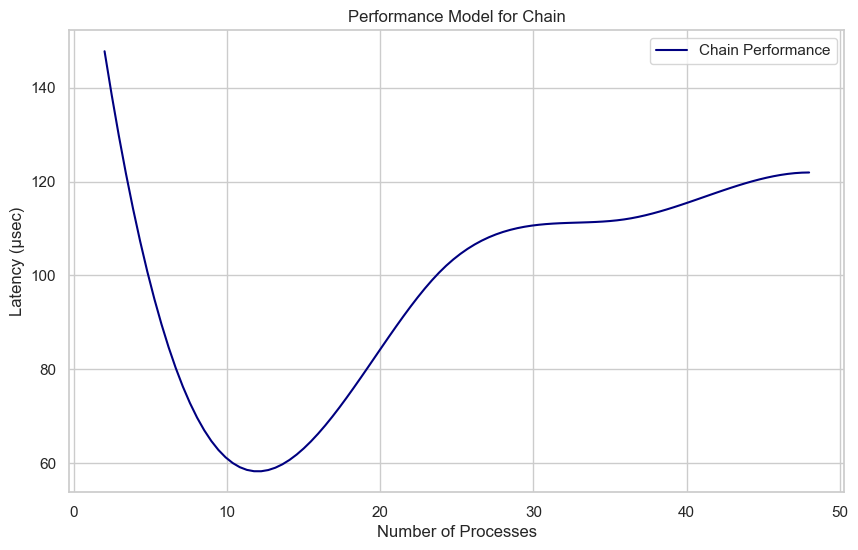

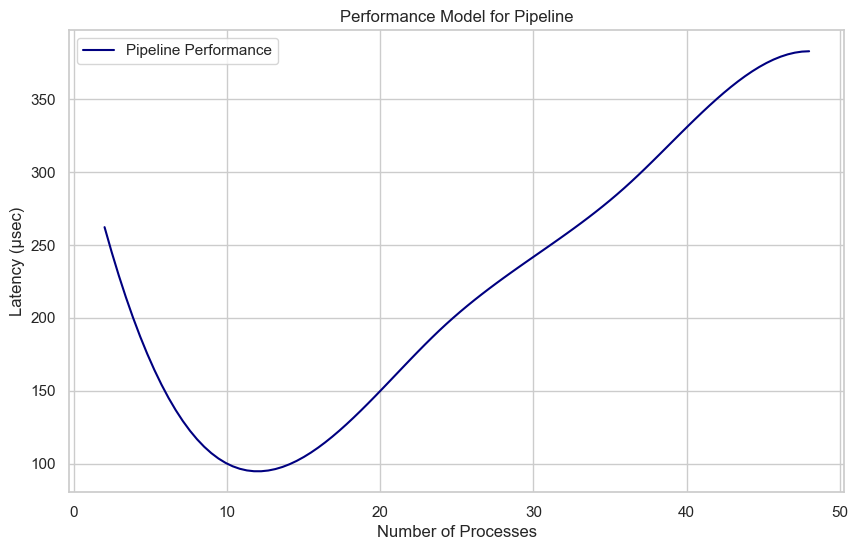

In [57]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline

# Assuming calculate_latency function is defined correctly

# Define the range for process counts
x_range = np.linspace(2, 48, 100)

# Define cubic splines and their data points for each algorithm
algorithms = {
    'Basic Linear': (x_basic_linear, y_basic_linear),
    'Chain': (x_chain, y_chain),
    'Pipeline': (x_pipeline, y_pipeline)
}

# Define message size and calculate latencies for core, socket, and node mappings
message_size = 1024
mapping_latency = {
    'Core': calculate_latency(1.1736, 0.0001, message_size),
    'Socket': calculate_latency(4.3637, 0.0001, message_size),
    'Node': calculate_latency(1.6064, 0.0002, message_size)
}

# Loop through each algorithm and create separate plots
for algorithm, (x, y) in algorithms.items():
    # Fit cubic spline
    cs = CubicSpline(x, y, bc_type='clamped')
    y_new = cs(x_range)
    
    # Create figure
    plt.figure(figsize=(10, 6))
    plt.plot(x_range, y_new, label=f'{algorithm} Performance', color='navy')
    #plt.scatter(x, y, color='navy', s=50, edgecolors='k')  # Mark segment endpoints

    # Add horizontal lines for core, socket, and node performance latencies
    #plt.plot(message_size, mapping_latency['Core'], color='blue', linestyle='--', label='Core Performance')
    # plt.plot(y=mapping_latency['Socket'],x = message_size, color='red', linestyle='--', label='Socket Performance')
    # plt.plot(y=mapping_latency['Node'],x = message_size, color='green', linestyle='--', label='Node Performance')

    # Add titles, labels, and grid
    plt.title(f'Performance Model for {algorithm}')
    plt.xlabel('Number of Processes')
    plt.ylabel('Latency (μsec)')
    #plt.loglog()  # Log-log scale for better visualization
    #plt.yscale('log')  # Log scale for y-axis
    plt.legend()
    plt.grid(True)
    plt.show()


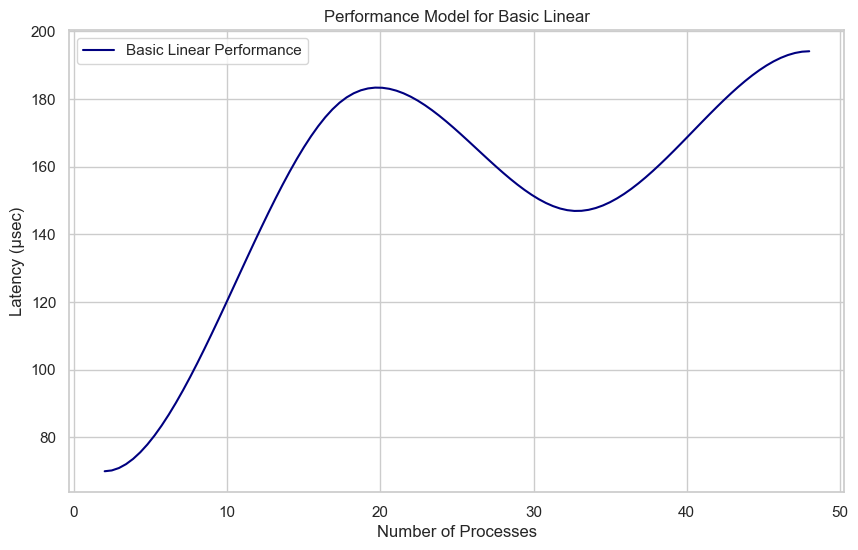

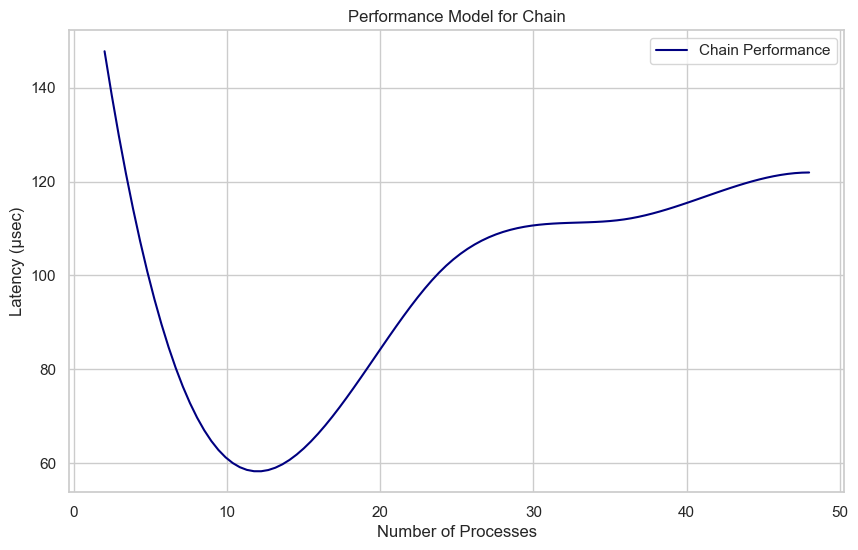

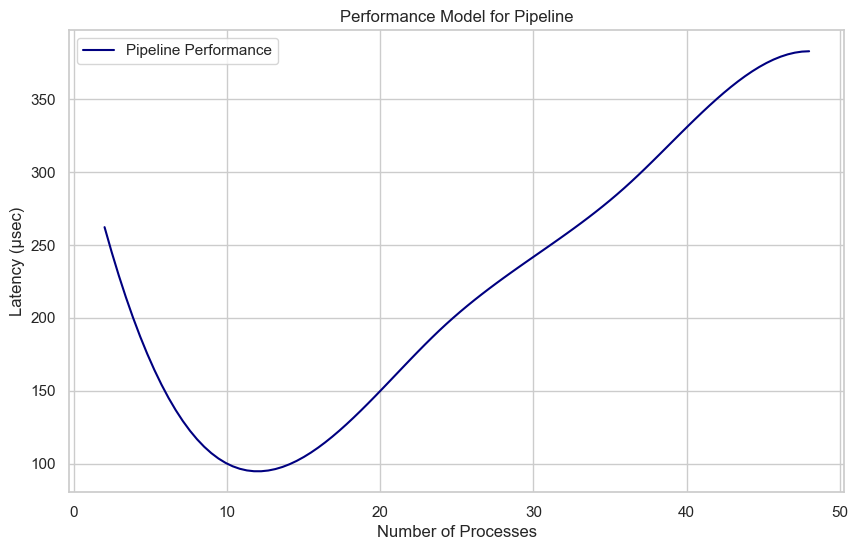

In [51]:
# Loop through each algorithm and create separate plots
for algorithm, (x, y) in algorithms.items():
    # Fit cubic spline
    cs = CubicSpline(x, y, bc_type='clamped')
    y_new = cs(x_range)
    
    # Create figure
    plt.figure(figsize=(10, 6))
    plt.plot(x_range, y_new, label=f'{algorithm} Performance', color='navy')
    #plt.scatter(x, y, color='navy', s=50, edgecolors='k')  # Mark segment endpoints

    # Add horizontal lines for core, socket, and node performance latencies
    # plt.axhline(y=mapping_latency['Core'], color='blue', linestyle='--', label='Core Performance')
    # plt.axhline(y=mapping_latency['Socket'], color='red', linestyle='--', label='Socket Performance')
    # plt.axhline(y=mapping_latency['Node'], color='green', linestyle='--', label='Node Performance')

    # Add titles, labels, and grid
    plt.title(f'Performance Model for {algorithm}')
    plt.xlabel('Number of Processes')
    plt.ylabel('Latency (μsec)')
    #plt.loglog()  # Log-log scale for better visualization
    #plt.yscale('log')  # Log scale for y-axis
    plt.legend()
    plt.grid(True)
    plt.show()


TypeError: float() argument must be a string or a real number, not 'CubicSpline'

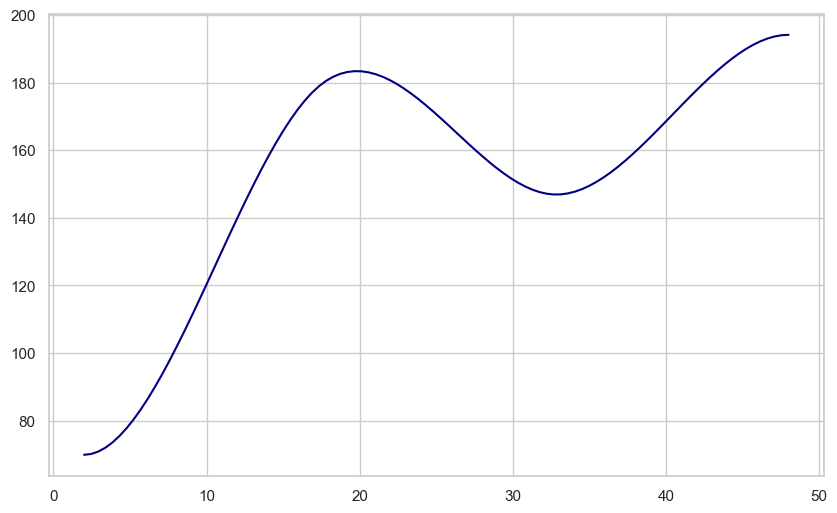

In [54]:
# Loop through each algorithm and create separate plots
for algorithm, (x, y) in algorithms.items():
    # Fit cubic spline
    cs = CubicSpline(x, y, bc_type='clamped')
    y_new = cs(x_range)
    
    # Create figure
    plt.figure(figsize=(10, 6))
    plt.plot(x_range, y_new, label=f'{algorithm} Performance', color='navy')
    #plt.scatter(x, y, color='navy', s=50, edgecolors='k')  # Mark segment endpoints

    plt.plot(cs_basic_linear, label='Basic Linear', color='blue')
    plt.plot(cs_chain, label='Chain', color='green')
    plt.plot(cs_pipeline, label='Pipeline', color='red')

    # Add horizontal lines for core, socket, and node performance latencies
    # plt.axhline(y=mapping_latency['Core'], color='blue', linestyle='--', label='Core Performance')
    # plt.axhline(y=mapping_latency['Socket'], color='red', linestyle='--', label='Socket Performance')
    # plt.axhline(y=mapping_latency['Node'], color='green', linestyle='--', label='Node Performance')

    # Add titles, labels, and grid
    plt.title(f'Performance Model for {algorithm}')
    plt.xlabel('Number of Processes')
    plt.ylabel('Latency (μsec)')
    #plt.loglog()  # Log-log scale for better visualization
    #plt.yscale('log')  # Log scale for y-axis
    plt.legend()
    plt.grid(True)
    plt.show()


# Reduce Algorithm Benchmarks



In [ ]:
import pandas as pd

# Load the data
reduce_data = pd.read_csv('../reduce_thin_results/thin_reduce_results.csv')

# Display the first few rows and basic statistics to understand the data
print(reduce_data.head())
print(reduce_data.describe())


  Algorithm  Processes  Size  Latency
0  pipeline          2     2     0.25
1  pipeline          2     4     0.22
2  pipeline          2     8     0.22
3  pipeline          2    16     0.22
4  pipeline          2    32     0.25
         Processes          Size      Latency
count  1440.000000  1.440000e+03  1440.000000
mean     25.000000  1.048575e+05   199.879021
std      13.849183  2.496978e+05   656.461497
min       2.000000  2.000000e+00     0.190000
25%      13.500000  5.600000e+01     1.377500
50%      25.000000  1.536000e+03     6.270000
75%      36.500000  4.096000e+04    37.635000
max      48.000000  1.048576e+06  6122.640000


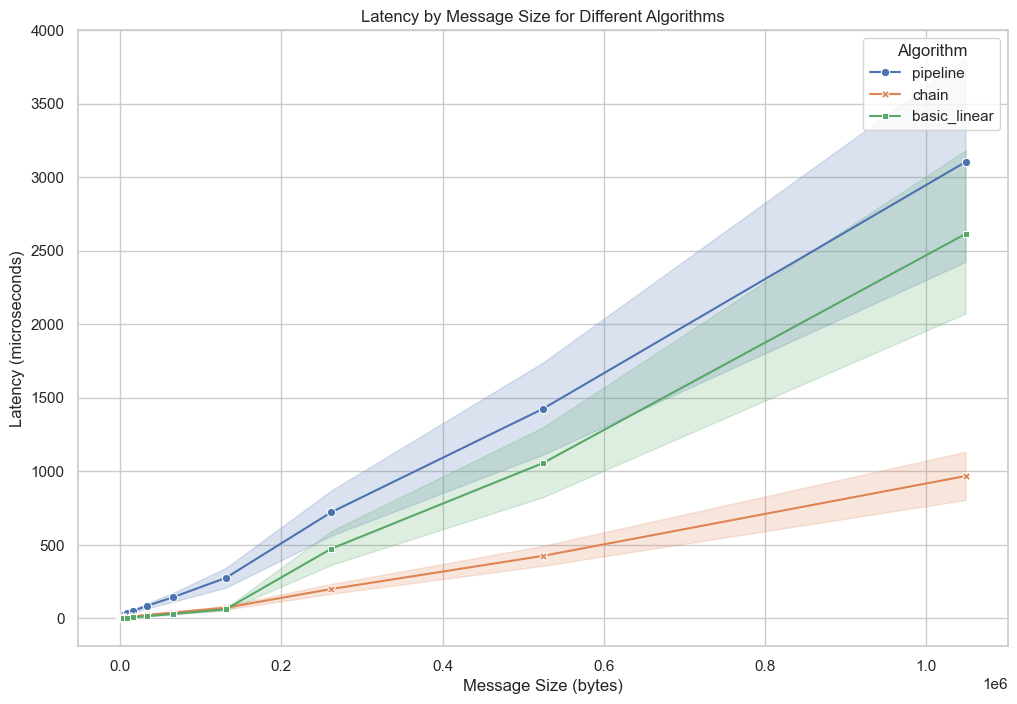

In [ ]:
# Plot latency by message size for each algorithm
plt.figure(figsize=(12, 8))
sns.lineplot(data=reduce_data, x='Size', y='Latency', hue='Algorithm', style='Algorithm', markers=True, dashes=False)
plt.title('Latency by Message Size for Different Algorithms')
plt.xlabel('Message Size (bytes)')
plt.ylabel('Latency (microseconds)')
#plt.xscale('log')  # Use logarithmic scale for better visibility on large ranges
#plt.yscale('log')
plt.show()

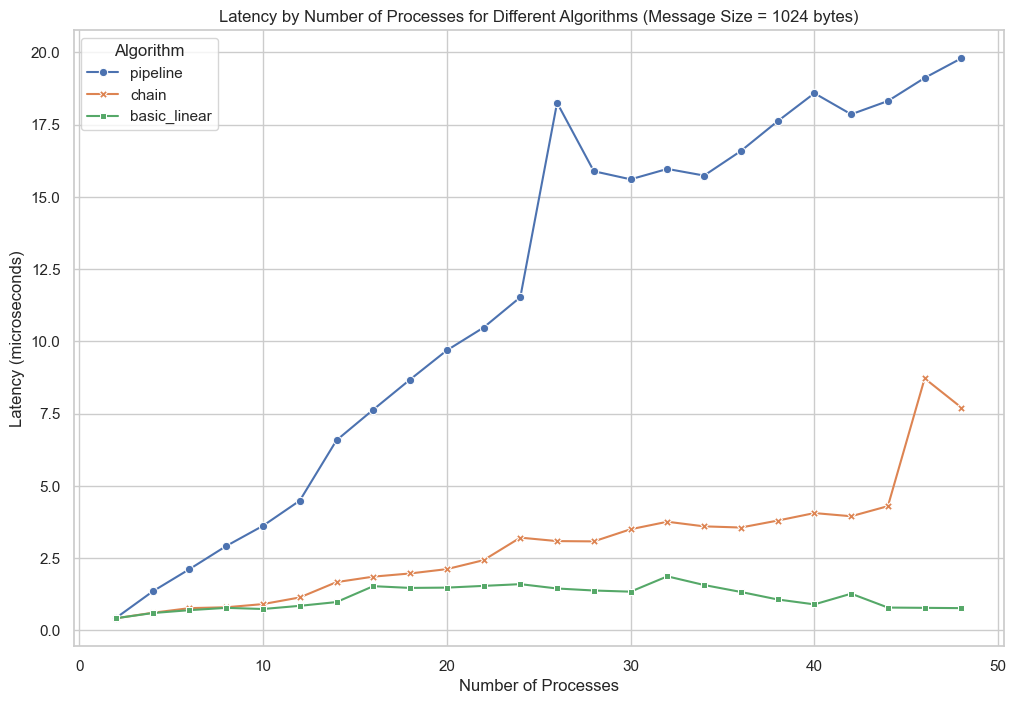

In [ ]:
# fix the message size and plot the latency with the number of processes
plt.figure(figsize=(12, 8))
sns.lineplot(data=reduce_data[reduce_data['Size'] == 1024], x='Processes', y='Latency', hue='Algorithm', style='Algorithm', markers=True, dashes=False)
plt.title('Latency by Number of Processes for Different Algorithms (Message Size = 1024 bytes)')
plt.xlabel('Number of Processes')
plt.ylabel('Latency (microseconds)')
plt.grid(True)
plt.show()


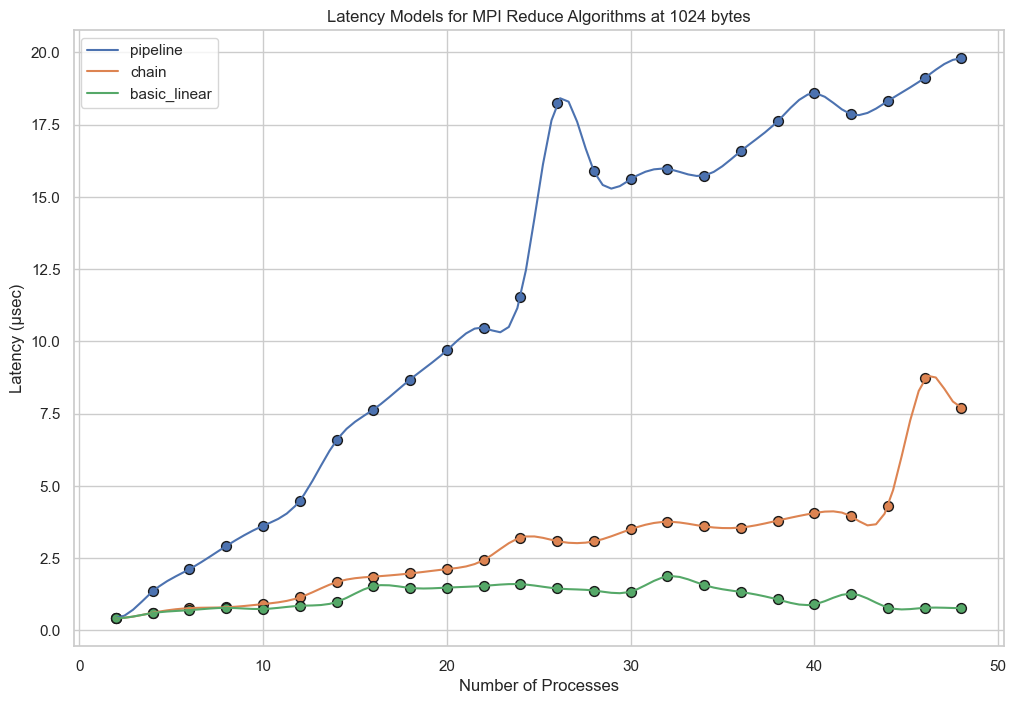

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline



# Filter data for a specific message size
specific_size = 1024
filtered_data = reduce_data[reduce_data['Size'] == specific_size]

# Assume that we have several algorithms to analyze, we need to find unique algorithms
unique_algorithms = filtered_data['Algorithm'].unique()

# Plot settings
plt.figure(figsize=(12, 8))

# Process range for plotting
x_range = np.linspace(2, 48, 100)

# Fit and plot a cubic spline for each algorithm
for algorithm in unique_algorithms:
    # Filter data for the current algorithm
    algorithm_data = filtered_data[filtered_data['Algorithm'] == algorithm]
    x = algorithm_data['Processes'].values
    y = algorithm_data['Latency'].values

    # Fit cubic spline
    cs = CubicSpline(x, y, bc_type='clamped')

    # Generate spline data for smooth plotting
    y_new = cs(x_range)

    # Plot
    plt.plot(x_range, y_new, label=f'{algorithm}')

    # Scatter plot of the actual data points
    plt.scatter(x, y, s=50, edgecolors='k')

plt.title('Latency Models for MPI Reduce Algorithms at 1024 bytes')
plt.xlabel('Number of Processes')
plt.ylabel('Latency (μsec)')
plt.legend()
plt.grid(True)
plt.show()


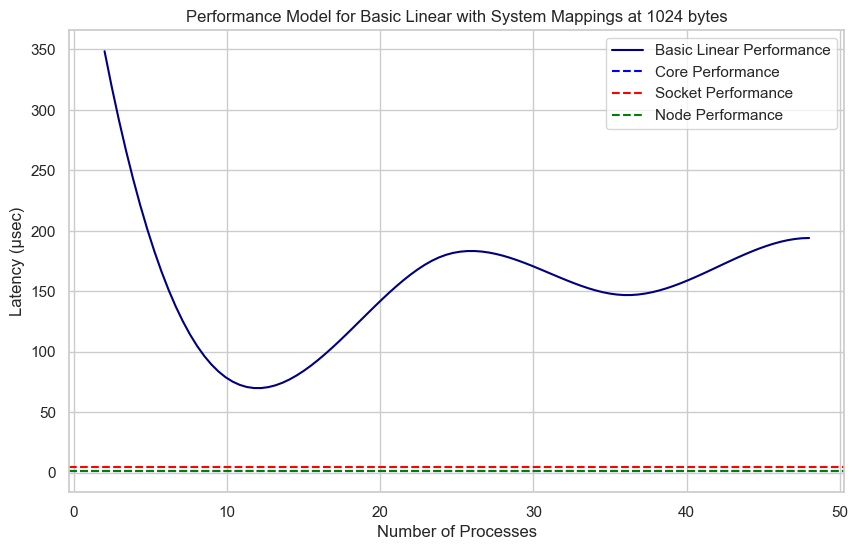

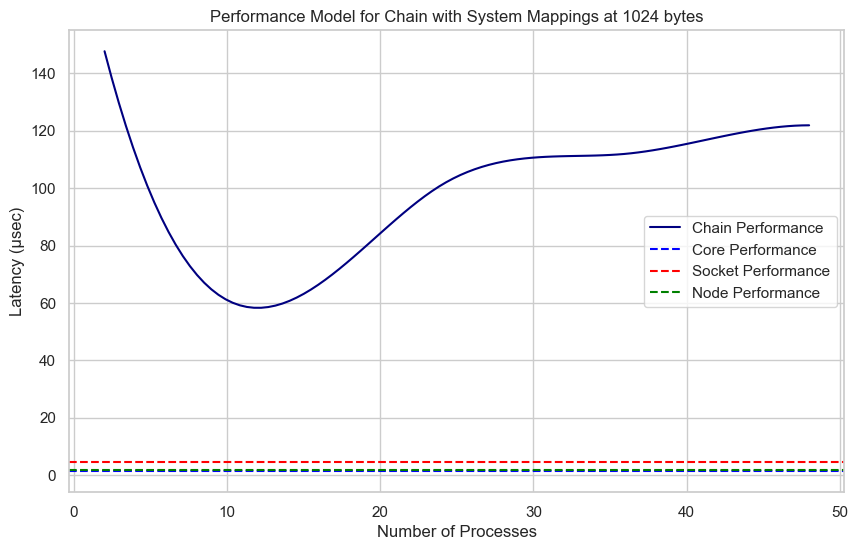

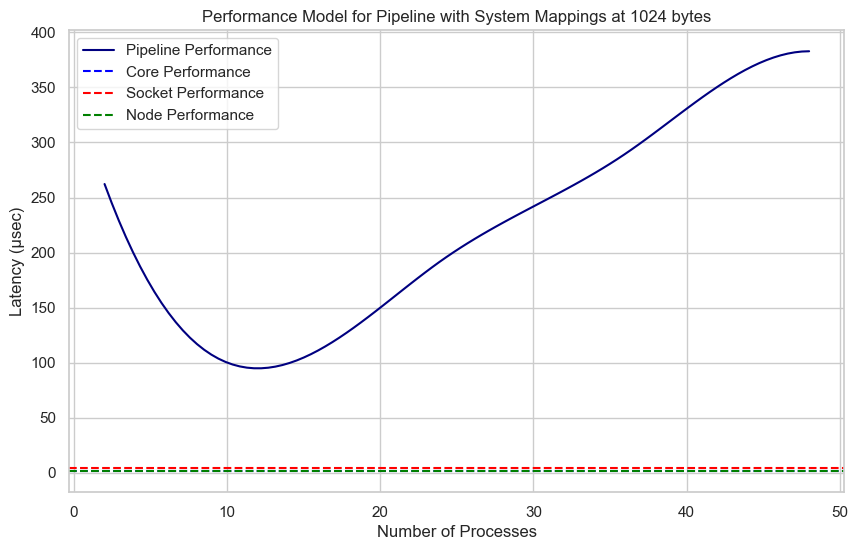

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline

# Assuming we have the cubic spline functions defined and data from previous steps

# Define message size and calculate latencies for core, socket, and node mappings
message_size = 1024
mapping_latency = {
    'Core': calculate_latency(1.1736, 0.0001, message_size),
    'Socket': calculate_latency(4.3637, 0.0001, message_size),
    'Node': calculate_latency(1.6064, 0.0002, message_size)
}

# Define algorithms and their cubic splines from previous fits
algorithms = {
    'Basic Linear': cs_basic_linear,
    'Chain': cs_chain,
    'Pipeline': cs_pipeline
}

# Generate a range for plotting
x_range = np.linspace(2, 48, 100)

# Loop through each algorithm and create separate plots
for algorithm, cs in algorithms.items():
    plt.figure(figsize=(10, 6))
    y_new = cs(x_range)
    
    # Plot the algorithm's performance model
    plt.plot(x_range, y_new, label=f'{algorithm} Performance', color='navy')

    # Add horizontal lines for core, socket, and node performance latencies
    plt.axhline(y=mapping_latency['Core'], color='blue', linestyle='--', label='Core Performance')
    plt.axhline(y=mapping_latency['Socket'], color='red', linestyle='--', label='Socket Performance')
    plt.axhline(y=mapping_latency['Node'], color='green', linestyle='--', label='Node Performance')

    # Add titles, labels, and grid
    plt.title(f'Performance Model for {algorithm} with System Mappings at 1024 bytes')
    plt.xlabel('Number of Processes')
    plt.ylabel('Latency (μsec)')
    plt.legend()
    plt.grid(True)
    plt.show()


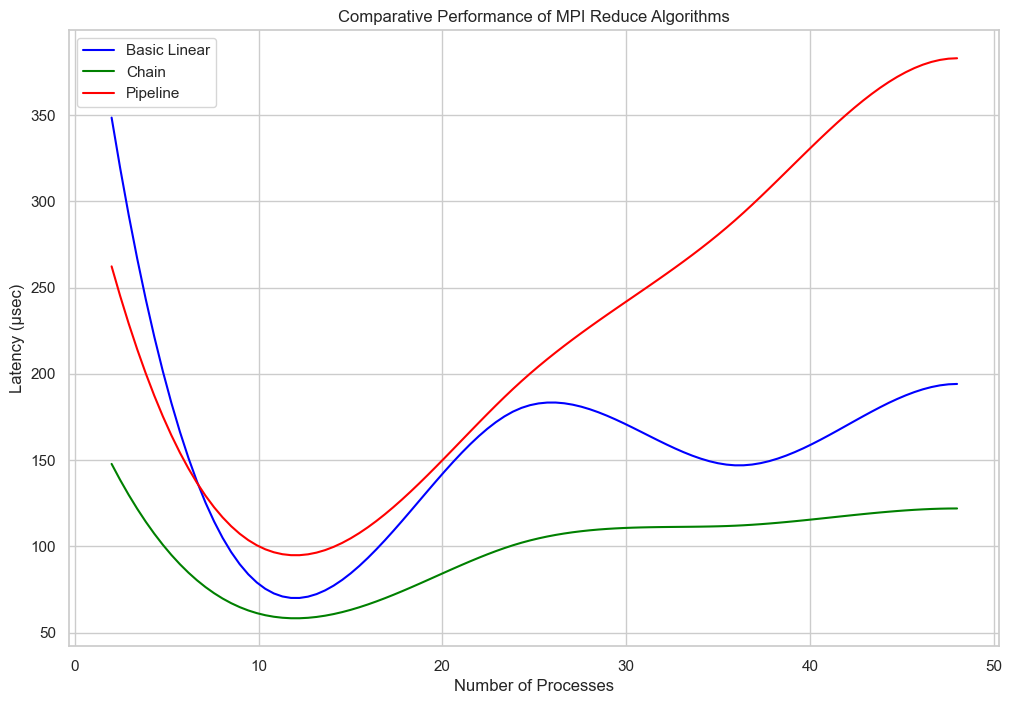

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline

# Define the process points and cubic splines for each algorithm
# You will need to replace these with your actual cubic spline definitions
# Example placeholders for cubic spline objects (assuming these are already defined)
# cs_basic_linear = CubicSpline(np.array([2, 12, 24, 36, 48]), np.array([...]))
# cs_chain = CubicSpline(np.array([2, 12, 24, 36, 48]), np.array([...]))
# cs_pipeline = CubicSpline(np.array([2, 12, 24, 36, 48]), np.array([...]))

# Generate points for plotting
x_range = np.linspace(2, 48, 100)

# Evaluate the cubic splines over the range
y_basic_linear = cs_basic_linear(x_range)
y_chain = cs_chain(x_range)
y_pipeline = cs_pipeline(x_range)

# Plotting all algorithms together
plt.figure(figsize=(12, 8))
plt.plot(x_range, y_basic_linear, label='Basic Linear', color='blue')
plt.plot(x_range, y_chain, label='Chain', color='green')
plt.plot(x_range, y_pipeline, label='Pipeline', color='red')

# Optional: Include performance models if defined
# plt.axhline(y=mapping_latency['Core'], color='gray', linestyle='--', label='Core Performance')
# plt.axhline(y=mapping_latency['Socket'], color='gray', linestyle='-.', label='Socket Performance')
# plt.axhline(y=mapping_latency['Node'], color='gray', linestyle=':', label='Node Performance')

plt.title('Comparative Performance of MPI Reduce Algorithms')
plt.xlabel('Number of Processes')
plt.ylabel('Latency (μsec)')
plt.legend()
plt.grid(True)
plt.show()
